In [1]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

# 문제2

In [3]:
origin1 = pd.read_excel("./data/apple_quality.xlsx")

In [4]:
origin1.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.49159,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [5]:
origin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
origin1.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
origin1.dropna(inplace = True)

In [8]:
origin1.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [9]:
origin1.describe(include = 'O')

,Acidity,Quality
count,4000.00000,4000
unique,4000.00000,2
top,-0.49159,good
freq,1.00000,2004


In [10]:
origin1['Acidity'] = origin1['Acidity'].astype('float64')

In [11]:
origin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [12]:
origin1.drop('A_id', axis = 1, inplace = True)

In [13]:
origin1['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

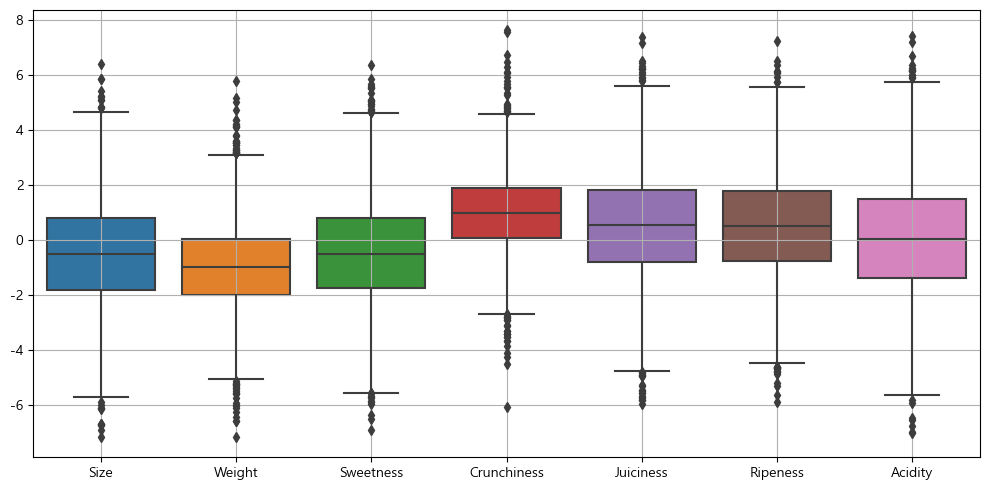

In [14]:
my_boxplot(origin1.drop('Quality', axis = 1))

In [15]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 처리하지 않음  |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [16]:
df1_p = pp.fit_transform(origin1, yname = 'Quality', ylabeling = True)

데이터프레임 크기 : (4000, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'], 총 7개
종속변수 컬럼명 : Quality / 종속변수 라벨링 여부 : True


In [17]:
df1_p

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1
...,...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866,0
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347,1
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950,0
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171,1


In [18]:
X = df1_p.copy()
Y = X.pop('Quality')

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0 , stratify = Y)

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
|  7 |   0.1 |        500 | l2        |          0.744688 |
| 13 |    10 |        500 | l2        |          0.743437 |
| 16 |   100 |        500 | l2        |          0.743437 |
| 10 |     1 |        500 | l2        |          0.743125 |
|  4 |  0.01 |        500 | l2        |          0.738125 |
|  1 | 0.001 |        500 | l2        |          0.715625 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |      0.24701 |  

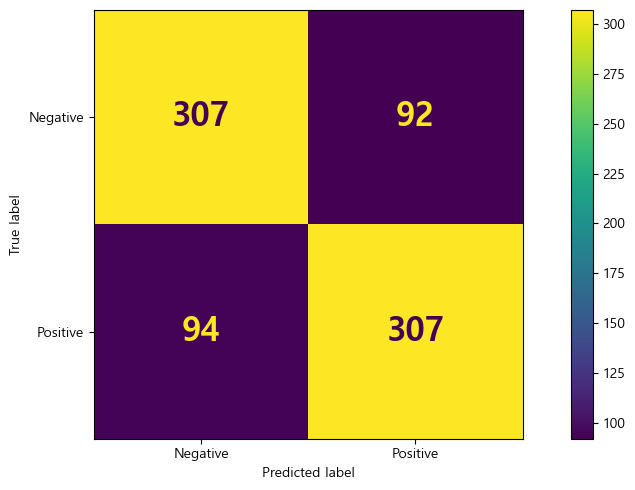


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


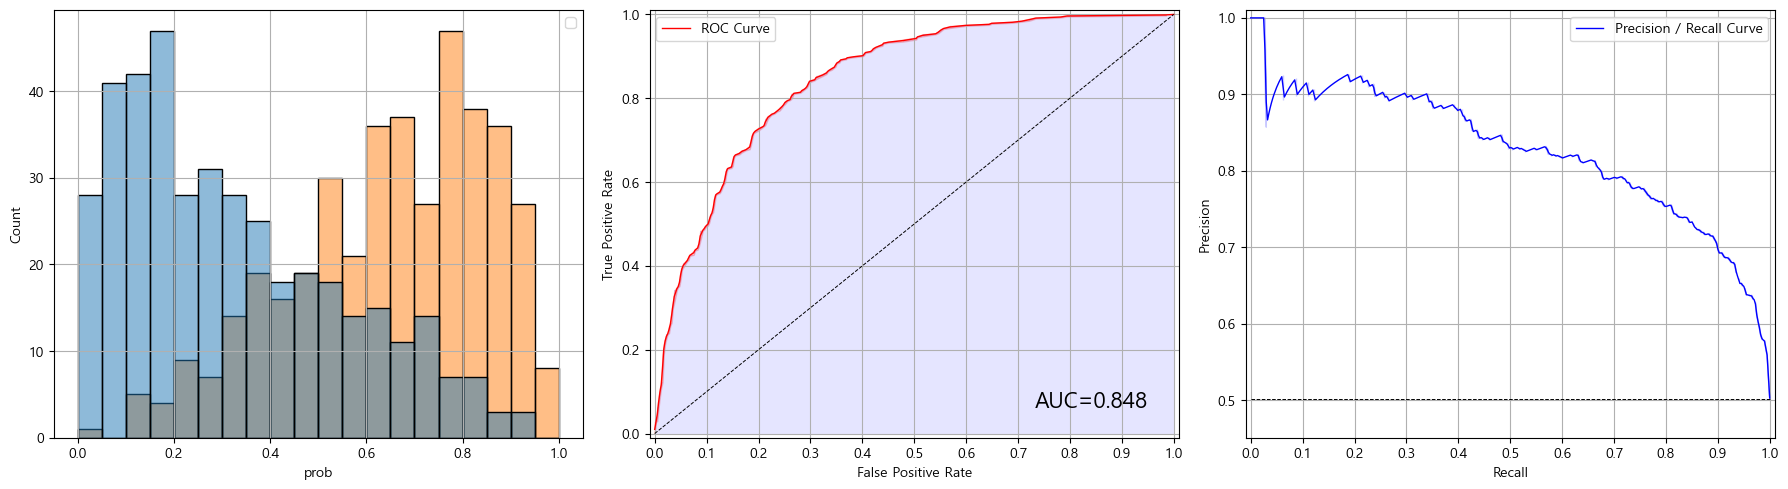


[학습곡선]


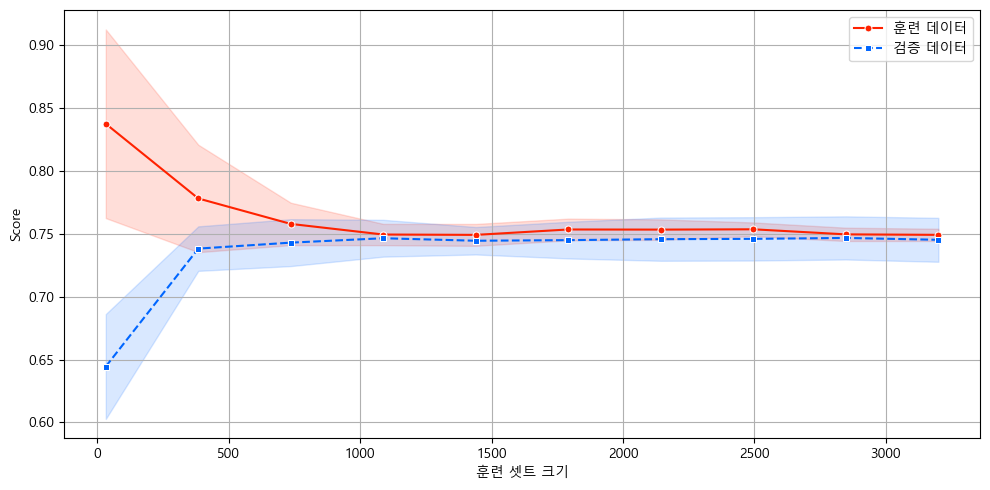

+----+------------+-------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수    |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+-------------+--------------------+------------+---------+------------+---------+------------|
|  0 | Quality    | Size        |             1.1437 |      0.115 |  9.9559 |          0 | 1.37188 |     3.1383 |
|  1 | Quality    | Weight      |             0.3951 |      0.102 |  3.8879 |          0 |  1.3012 |     1.4846 |
|  2 | Quality    | Sweetness   |             0.9958 |       0.11 |  9.0696 |          0 | 1.41833 |     2.7069 |
|  3 | Quality    | Crunchiness |             0.0276 |      0.091 |  0.3039 |      0.761 | 1.20037 |      1.028 |
|  4 | Quality    | Juiciness   |             0.7751 |      0.103 |  7.5027 |          0 | 1.21016 |     2.1709 |
|  5 | Quality    | Ripeness    |            -0.2629 |      0.102 | -2.5829 |       0.01 |  1.4233 |     0.768

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [20]:
my_logistic_classification(x_train, y_train, x_test, y_test)

In [21]:
pp_roll = YjkPreprocessor()

In [22]:
outline_li = ['q', 'm', 'a', None]
scaler_li = ['s', 'm', 'r', None]
encoder_li = ['o', 'ord']

In [23]:
results_pp = []

def add_result_pp(model, note, x_test, y_test):
    global results_pp
    tmp_dict = {}
    tmp_dict['How'] = note
    tmp_dict['Accuracy'] = model.score(x_test, y_test)
    tmp_dict['model'] = model
    results_pp.append(tmp_dict)

In [24]:
# for i in scaler_li:
#     for j in encoder_li:
#         for k in outline_li:
#             pp_roll.set_strategy(outline = k, null = None, encoder = j, scaler = i, alert = False)
#             df1_p = pp_roll.fit_transform(origin1, yname = 'Quality', ylabeling = True, alert = False)
#             X = df1_p.drop('Quality', axis = 1)
#             Y = df1_p['Quality']
    
#             x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2, stratify = Y)
#             model = my_knn_classification(x_train, y_train, x_test, y_test, report = False, learning_curve = False)
#             add_result_pp(model, f"Scaler : {i}, Encoder : {j}, outline : {k}", x_test, y_test)

In [25]:
# pd.DataFrame(results_pp).sort_values('Accuracy', ascending = False).head()

In [26]:
pp1 = YjkPreprocessor()
pp1.set_strategy(outline = 'q', null = None, scaler = 'r')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 경계값 대체   |
| 결측치 처리 | 처리하지 않음 |
| 스케일러    | RobustScaler  |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [27]:
df1_p = pp1.fit_transform(origin1, yname = 'Quality', ylabeling = True)

데이터프레임 크기 : (4000, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'], 총 7개
종속변수 컬럼명 : Quality / 종속변수 라벨링 여부 : True


In [28]:
X = df1_p.copy()
Y = X.pop('Quality')

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
|  7 |   0.1 |        500 | l2        |          0.745313 |
| 10 |     1 |        500 | l2        |          0.743438 |
| 13 |    10 |        500 | l2        |          0.743125 |
| 16 |   100 |        500 | l2        |          0.743125 |
|  4 |  0.01 |        500 | l2        |          0.733437 |
|  1 | 0.001 |        500 | l2        |          0.711563 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.244458 |  

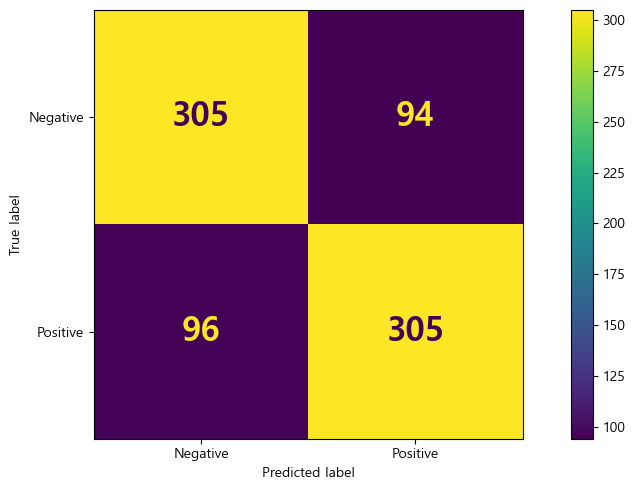


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


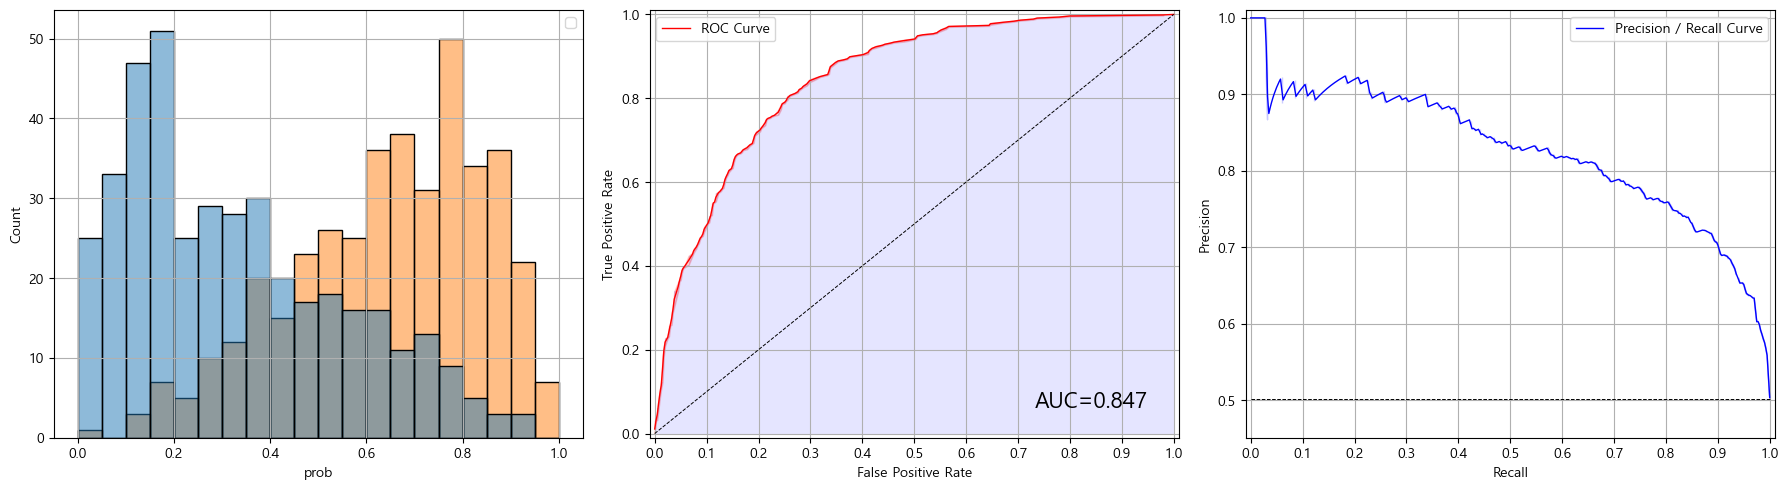


[학습곡선]


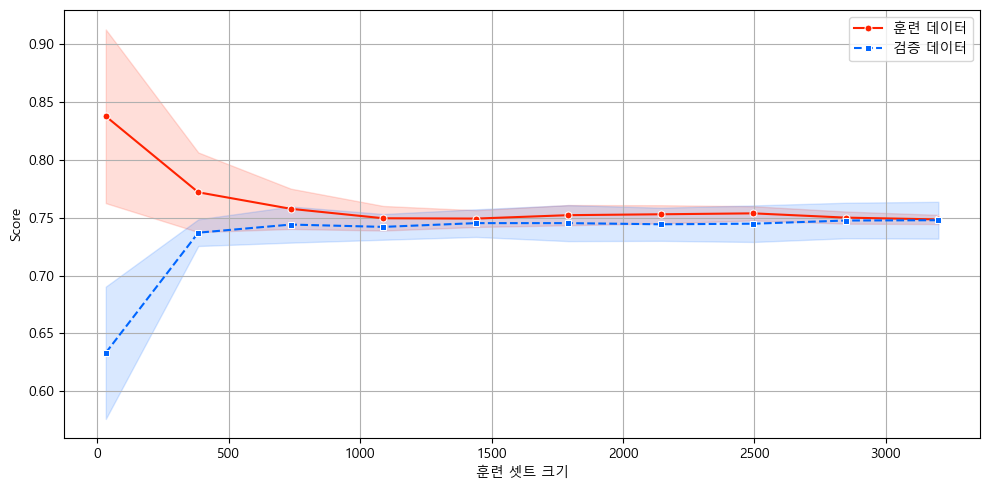

+----+------------+-------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수    |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+-------------+--------------------+------------+---------+------------+---------+------------|
|  0 | Quality    | Size        |             1.4801 |      0.153 |  9.6665 |          0 | 1.36972 |     4.3935 |
|  1 | Quality    | Weight      |             0.4626 |      0.129 |  3.5783 |          0 | 1.29476 |     1.5882 |
|  2 | Quality    | Sweetness   |             1.2385 |      0.141 |  8.7863 |          0 |  1.4144 |     3.4506 |
|  3 | Quality    | Crunchiness |             0.0284 |      0.121 |  0.2335 |      0.815 | 1.19848 |     1.0288 |
|  4 | Quality    | Juiciness   |              1.016 |      0.139 |  7.2979 |          0 | 1.21092 |     2.7621 |
|  5 | Quality    | Ripeness    |             -0.368 |      0.136 | -2.7032 |      0.007 | 1.41223 |     0.692

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [30]:
my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  5 | euclidean |             7 | distance  |          0.890625 |
|  4 | euclidean |             7 | uniform   |           0.88875 |
|  3 | euclidean |             5 | distance  |          0.888437 |
|  2 | euclidean |             5 | uniform   |          0.888125 |
|  0 | euclidean |             3 | uniform   |          0.884063 |
|  1 | euclidean |             3 | distance  |          0.884063 |
| 11 | manhattan |             7 | distance  |          0.881875 |
| 10 | manhattan |             7 | uniform   |          0.880937 |
|  8 | manhattan |             5 | uniform   |           0.87875 |
|  9 | manhattan |             5 | distance  |          0.878438 |
|  6 | manhattan |             3 | uniform   |          0.876563 |
|  7 | manhattan |             3 | distance  |         

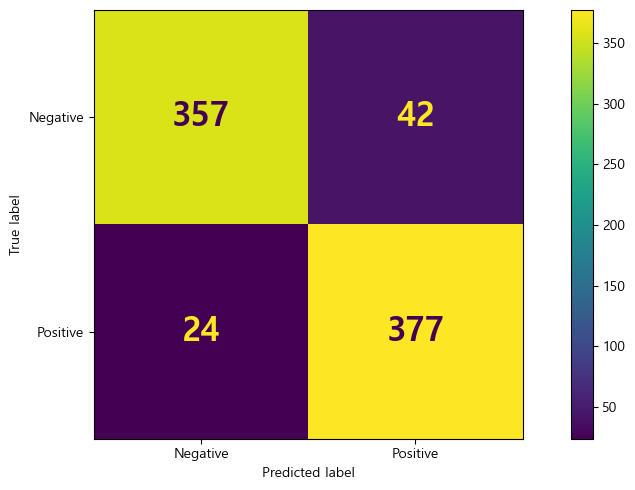


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


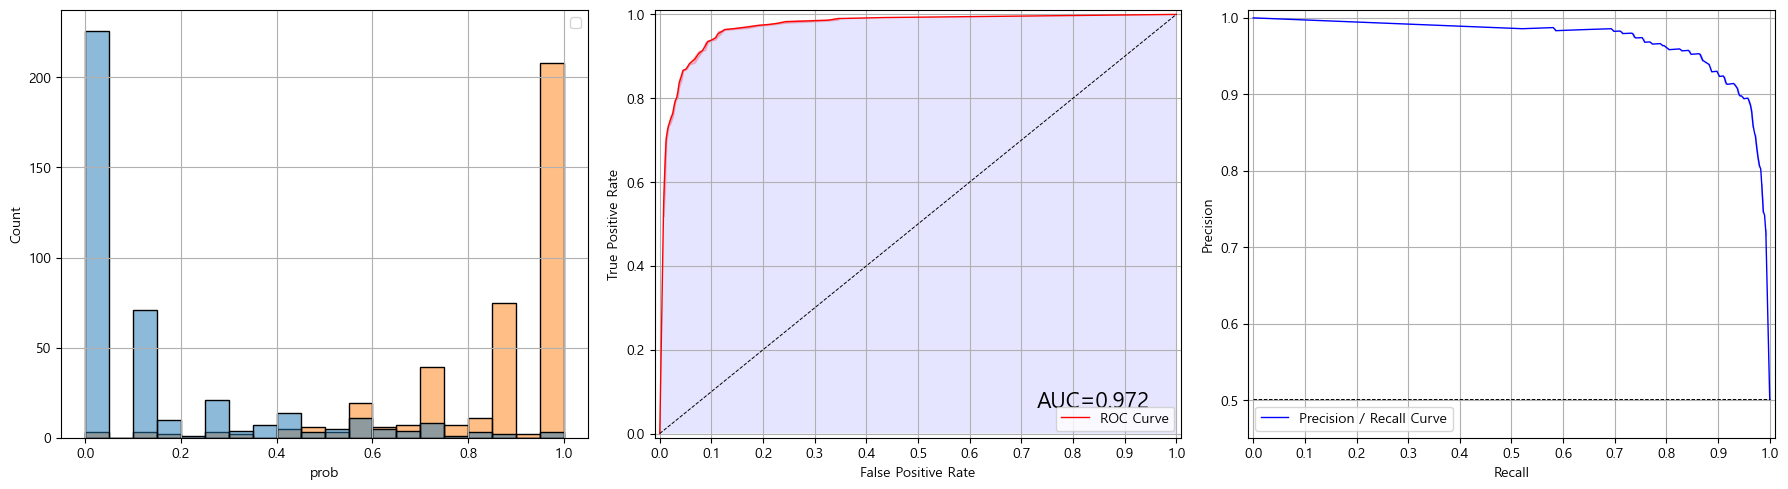


[학습곡선]


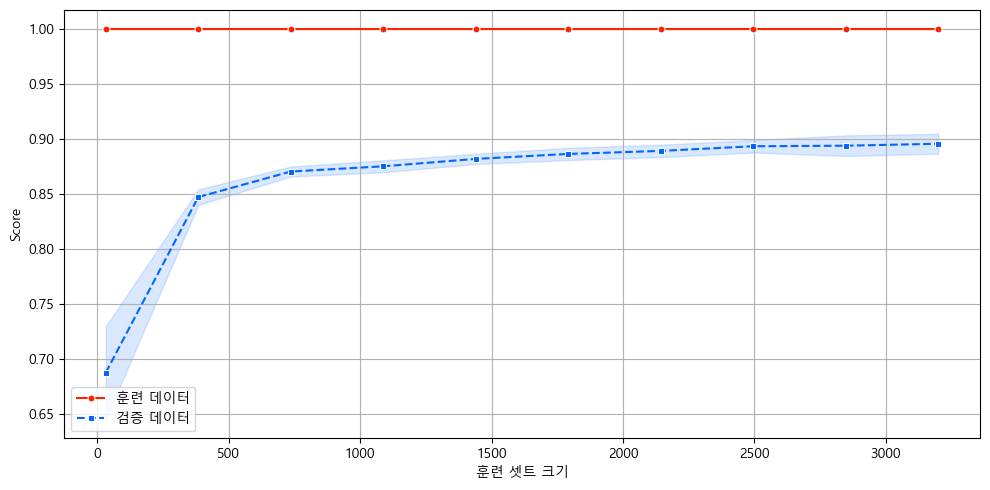

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7,
                     weights='distance')

In [31]:
my_knn_classification(x_train, y_train, x_test, y_test)

In [32]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier']


In [33]:
%%time

result_df1 = yjk_classifier_multi_gridsearch(support, x_train, x_test, y_train, y_test)
result_df1

CPU times: total: 31.3 s
Wall time: 1min 11s


,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=6,...","{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}",0.895312,0.91875
SGDClassifier,"SGDClassifier(alpha=0.001, loss='huber', max_i...","{'alpha': 0.001, 'loss': 'huber', 'max_iter': ...",0.745625,0.77125
LogisticRegression,"LogisticRegression(C=0.001, n_jobs=-1, penalty...","{'C': 0.001, 'max_iter': 100, 'penalty': None}",0.744062,0.77000


In [34]:
final_model1 = result_df1.iloc[0, 0]

In [35]:
final_model1.score(x_test, y_test)

0.91875

- 로지스틱 : 정확도 0.76, ROC_AUC : 0.85
- KNN : 정확도 0.9, ROC_AUC : 0.97
    - KNN의 성능이 더 우수하다

# 문제3

In [36]:
origin2 = pd.read_excel("./data/smoker_status.xlsx")

In [37]:
origin2.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [38]:
origin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

In [39]:
origin2['smoking'].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

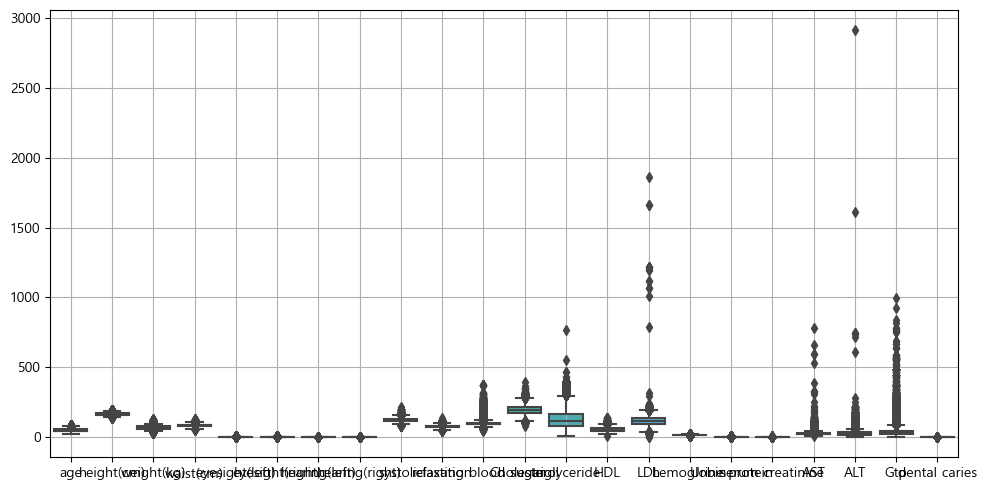

In [40]:
my_boxplot(origin2.drop('smoking', axis = 1))

In [41]:
df2 = origin2.copy()

In [42]:
df2['dental caries'] = df2['dental caries'].astype('category')

In [43]:
outline_li = ['q', 'm', 'a', None]
scaler_li = ['s', 'm', 'r', None]
encoder_li = ['o', 'ord']

In [44]:
results_pp = []

In [45]:
# for i in scaler_li:
#     for j in encoder_li:
#         for k in outline_li:
#             pp_roll.set_strategy(outline = k, null = None, encoder = j, scaler = i, alert = False)
#             df2_p = pp_roll.fit_transform(df2, yname = 'smoking', ylabeling = True, alert = False)
#             X = df2_p.drop('smoking', axis = 1)
#             Y = df2_p['smoking']
    
#             x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2, stratify = Y)
#             model = my_logistic_classification(x_train, y_train, x_test, y_test, report = False, learning_curve = False, hist = False, roc = False, pr = False)
#             add_result_pp(model, f"Scaler : {i}, Encoder : {j}, outline : {k}", x_test, y_test)

In [46]:
# pd.DataFrame(results_pp).sort_values('Accuracy', ascending = False).head()

In [47]:
pp2 = YjkPreprocessor()
pp2.set_strategy(outline = 'q', scaler = 'm', encoder = 'o')

아래와 같이 처리합니다.
+-------------+--------------+
| 범주        | 처리방법     |
|-------------+--------------|
| 이상치 처리 | 경계값 대체  |
| 결측치 처리 | 중앙값 대체  |
| 스케일러    | MinMaxScaler |
| 인코딩      | 원핫인코딩   |
+-------------+--------------+


In [48]:
df2_p = pp2.fit_transform(df2, yname = 'smoking', ylabeling = True)

데이터프레임 크기 : (159256, 23)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp'], 총 21개
명목형 데이터 컬럼 : ['dental caries'], 총 1개
종속변수 컬럼명 : smoking / 종속변수 라벨링 여부 : True


In [75]:
X = df2_p.copy()
Y = X.pop('smoking')

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 16 |   100 |        500 | l2        |          0.752794 |
| 13 |    10 |        500 | l2        |          0.752763 |
| 10 |     1 |        500 | l2        |          0.752661 |
|  7 |   0.1 |        500 | l2        |          0.752378 |
|  4 |  0.01 |        500 | l2        |          0.750659 |
|  1 | 0.001 |        500 | l2        |          0.735236 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.294405 |  

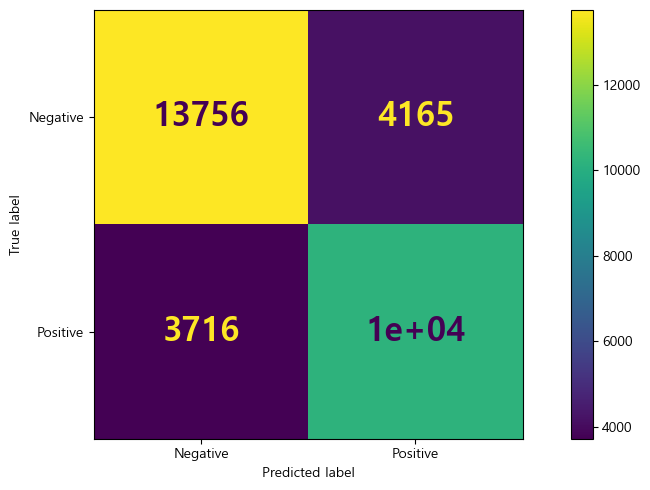


[Roc Curve]


LogisticRegression(C=100, max_iter=500, n_jobs=-1)

In [51]:
my_logistic_classification(x_train, y_train, x_test, y_test, pr = False, hist = False, roc = False, learning_curve = False, report = False)

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.734671 |
+----+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.819056 |     0.735119 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.775098 |     0.685083 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.825939 |     0.729883 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.186295 |     0.260811 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.813705 |     0.739189 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.799712 |     0.706774 | 정밀도와 

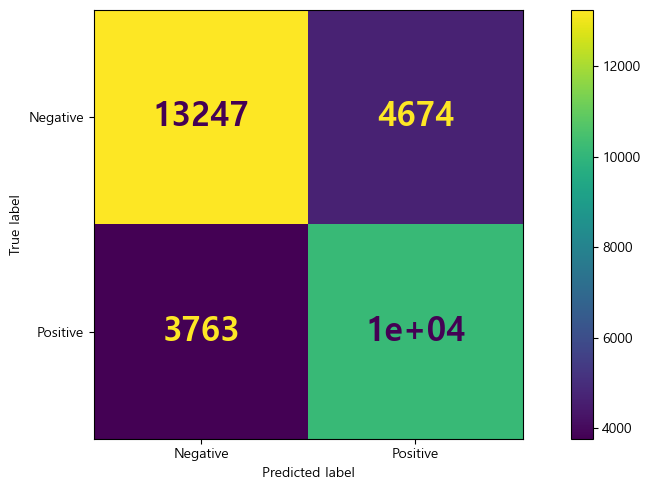


[Roc Curve]


KNeighborsClassifier(n_jobs=-1)

In [52]:
my_knn_classification(x_train, y_train, x_test, y_test, pr = False, hist = False, roc = False, learning_curve = False, report = False)

In [53]:
%%time

result2 = yjk_classifier_multi_gridsearch(support, x_train, x_test, y_train, y_test, randomized_search = True, cv = 5)
result2

CPU times: total: 58min 19s
Wall time: 6min 34s


,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
LogisticRegression,"LogisticRegression(C=100, max_iter=300, n_jobs...","{'penalty': None, 'max_iter': 300, 'C': 100}",0.752771,0.752574
SGDClassifier,"SGDClassifier(alpha=0.001, loss='log_loss', ma...","{'tol': 0.01, 'penalty': 'l2', 'max_iter': 500...",0.752323,0.748336
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7,...","{'weights': 'uniform', 'p': 1, 'n_neighbors': 7}",0.743226,0.743470


- 로지스틱 회귀 : 정확도 0.75, ROC_AUC 0.84
- KNN : 정확도 0.69 ROC_AUC 0.8
    - 로지스틱 회귀의 성능이 더 우수함

In [54]:
origin3 = pd.read_excel("./data/customer_segmentation.xlsx")

In [55]:
origin3.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [56]:
origin3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [57]:
origin3.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [58]:
origin3['Ever_Married'].value_counts()

Ever_Married
Yes    6163
No     4342
Name: count, dtype: int64

In [59]:
origin3['Graduated'].value_counts()

Graduated
Yes    6570
No     4023
Name: count, dtype: int64

In [60]:
origin3['Profession'].value_counts()

Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64

In [61]:
origin3['Family_Size'].value_counts()

Family_Size
2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: count, dtype: int64

In [62]:
origin3['Var_1'].value_counts()

Var_1
Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: count, dtype: int64

In [63]:
df3 = origin3.drop('ID', axis = 1)

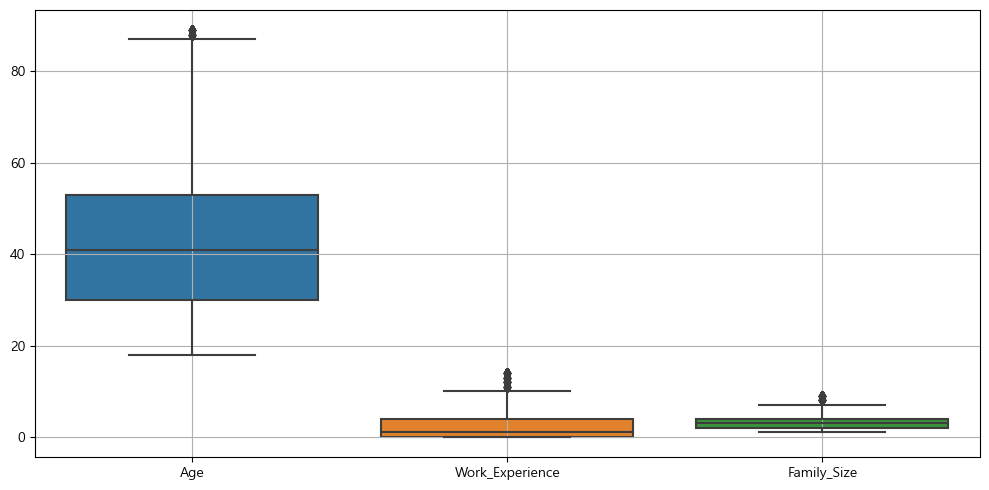

In [64]:
my_boxplot(df3)

In [65]:
results_pp = []

In [66]:
# for i in scaler_li:
#     for j in encoder_li:
#         for k in outline_li:
#             pp_roll.set_strategy(outline = k, null = 'median', encoder = j, scaler = i, alert = False)
#             df3_p = pp_roll.fit_transform(df3, yname = 'Segmentation', ylabeling = True, alert = False)
#             X = df3_p.drop('Segmentation', axis = 1)
#             Y = df3_p['Segmentation']
    
#             x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2, stratify = Y)
#             model = my_logistic_classification(x_train, y_train, x_test, y_test, report = False, learning_curve = False, hist = False, roc = False, pr = False)
#             add_result_pp(model, f"Scaler : {i}, Encoder : {j}, outline : {k}", x_test, y_test)

In [67]:
# pd.DataFrame(results_pp).sort_values('Accuracy', ascending = False).head()

In [68]:
pp3 = YjkPreprocessor()
pp3.set_strategy(outline = 'a', null = 'median', scaler = None, encoder = 'o')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 평균값 대체   |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 처리하지 않음 |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [69]:
df3_p = pp3.fit_transform(df3, yname = 'Segmentation', ylabeling = True)

데이터프레임 크기 : (10695, 10)

[열별 결측치 개수]
+-----------------+-------------+
| 열명            |   결측치 수 |
|-----------------+-------------|
| Ever_Married    |         190 |
| Graduated       |         102 |
| Profession      |         162 |
| Work_Experience |        1098 |
| Family_Size     |         448 |
| Var_1           |         108 |
+-----------------+-------------+

연속형 데이터 컬럼 : ['Age', 'Work_Experience', 'Family_Size'], 총 3개
명목형 데이터 컬럼 : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], 총 6개
종속변수 컬럼명 : Segmentation / 종속변수 라벨링 여부 : True


In [88]:
X = df3_p.copy()
Y = X.pop('Segmentation')

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 10 |     1 |        500 | l2        |          0.467739 |
|  4 |  0.01 |        500 | l2        |          0.467389 |
| 16 |   100 |        500 | l2        |          0.467155 |
| 13 |    10 |        500 | l2        |          0.467155 |
|  7 |   0.1 |        500 | l2        |          0.466337 |
|  1 | 0.001 |        500 | l2        |          0.445067 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.474287 |     0.471248 | 예측 결과(T

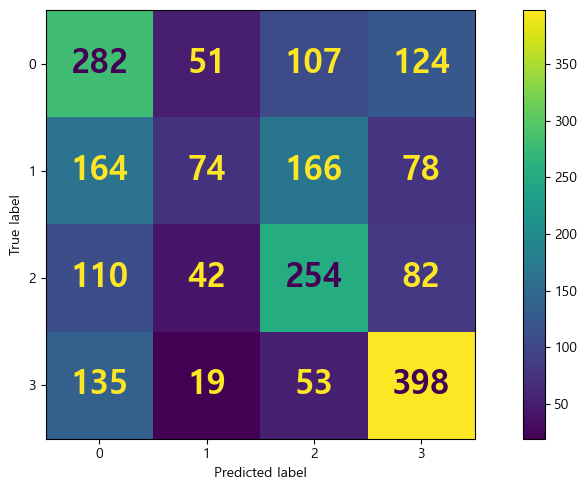


[Roc Curve]


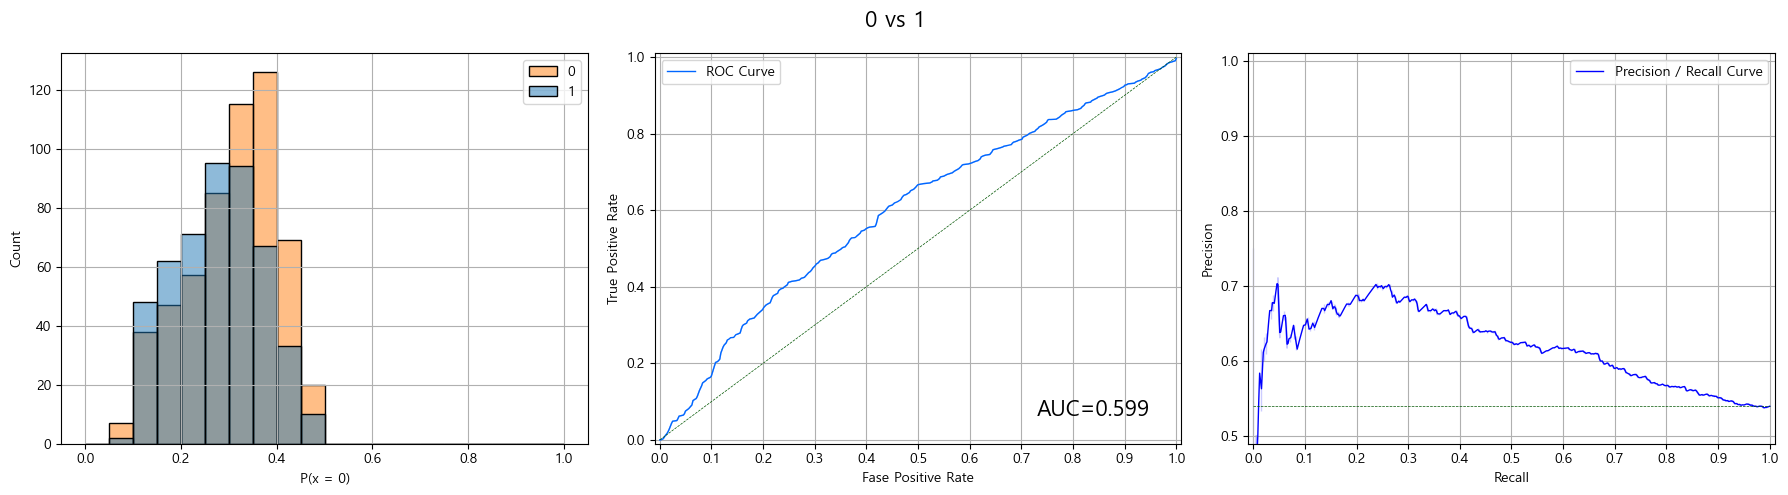

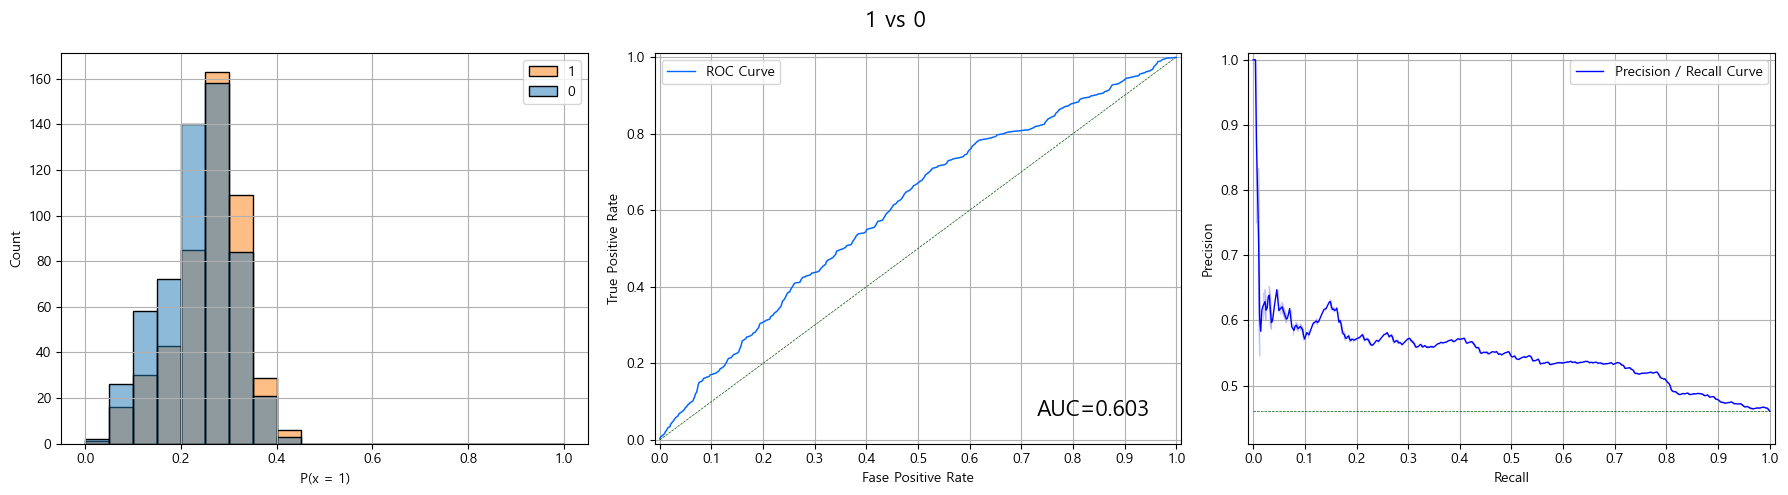

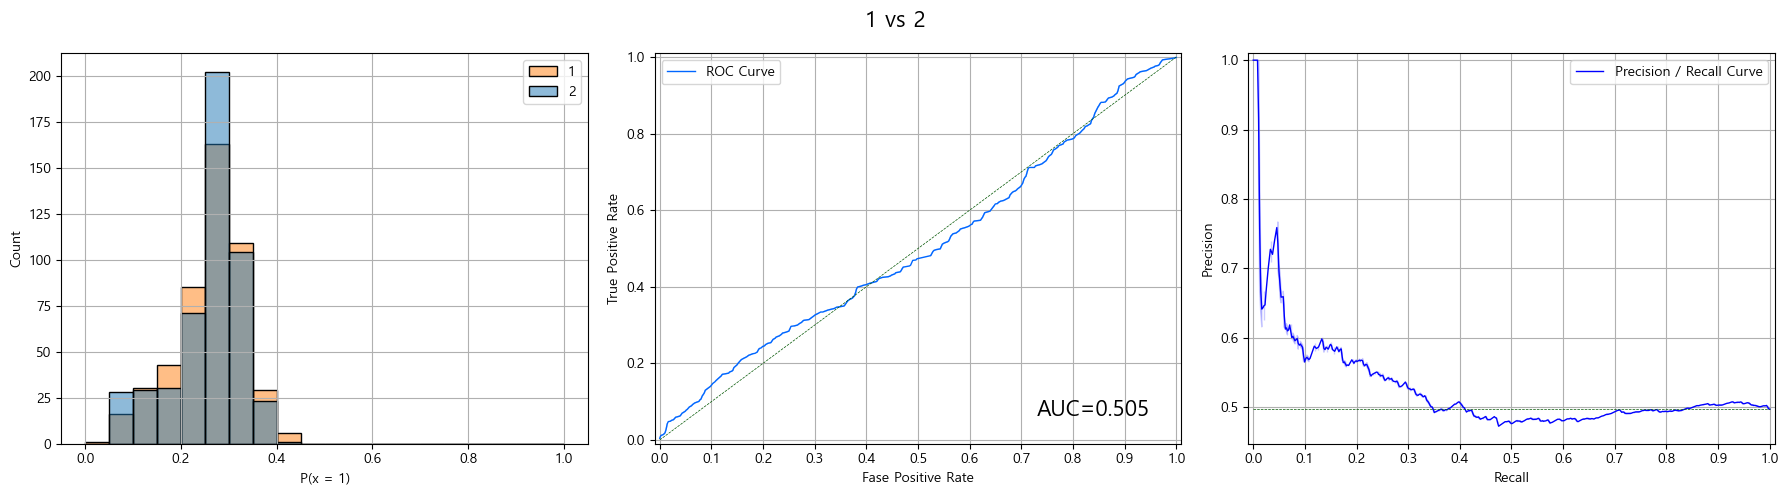

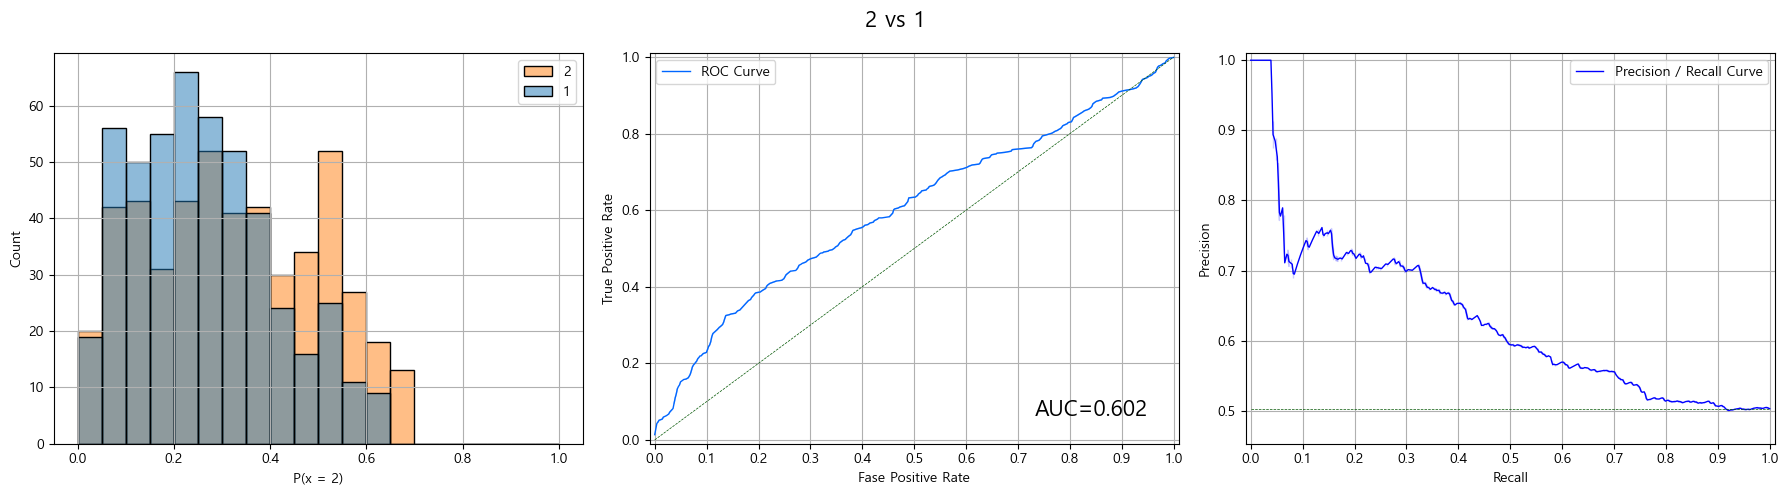

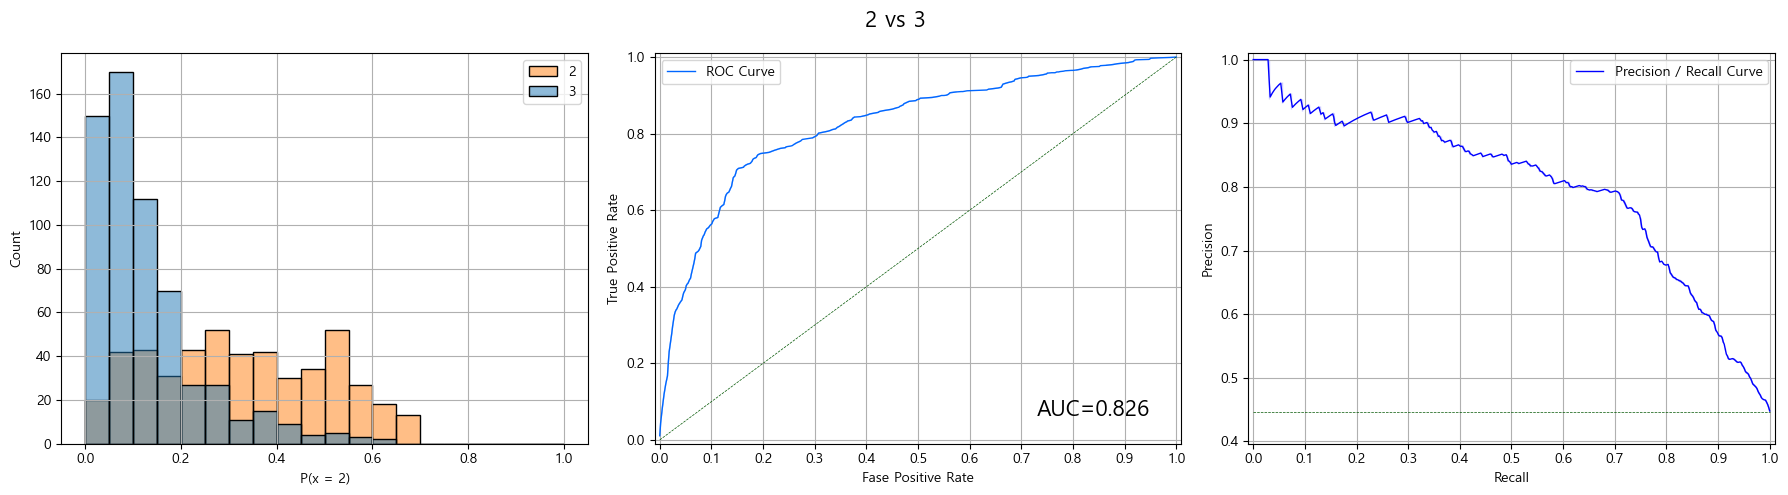

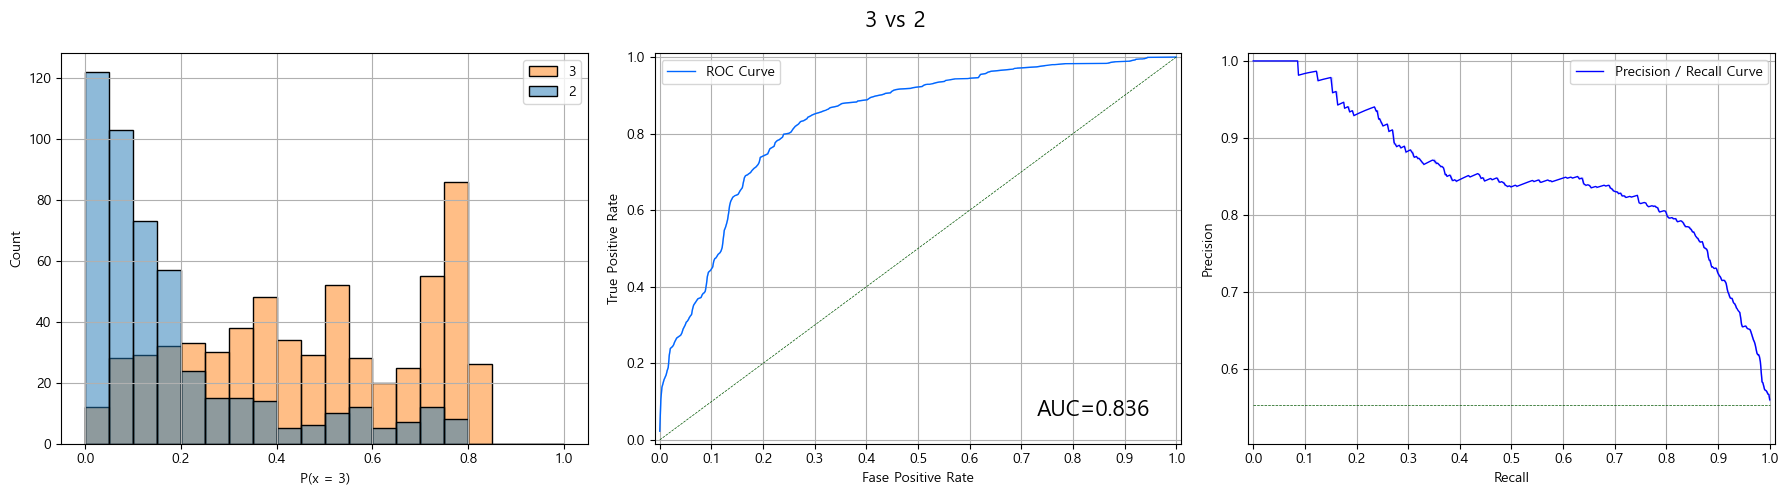

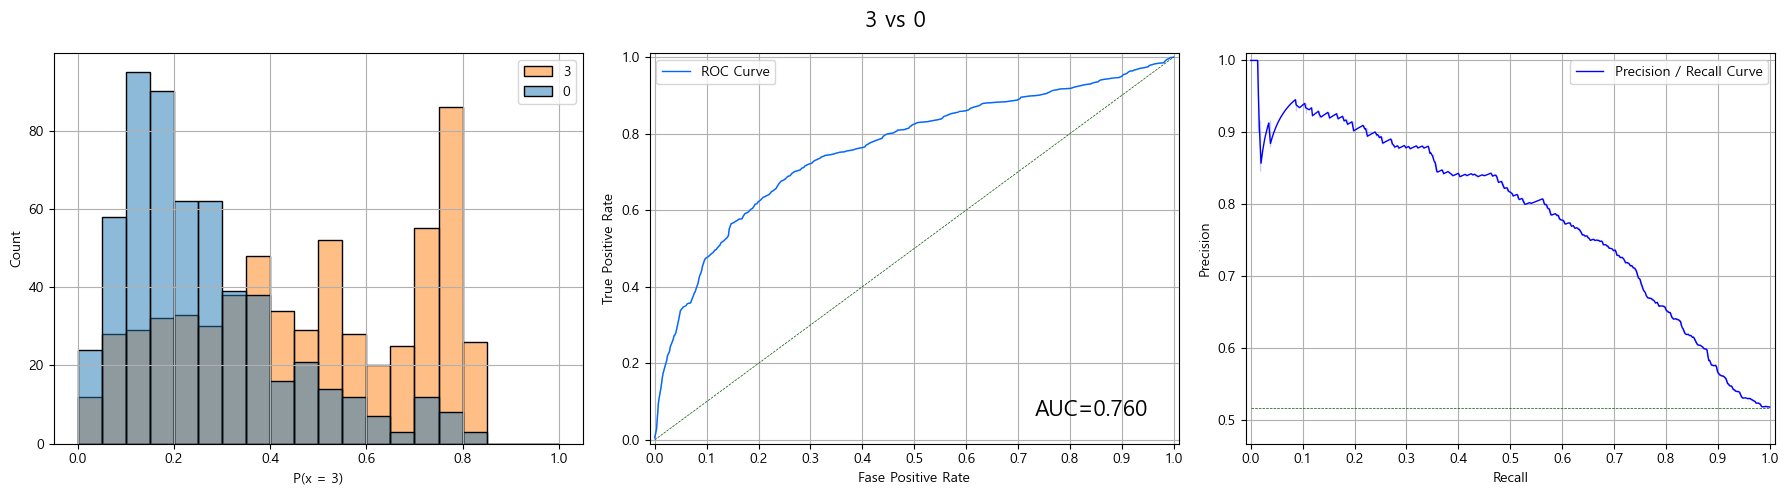

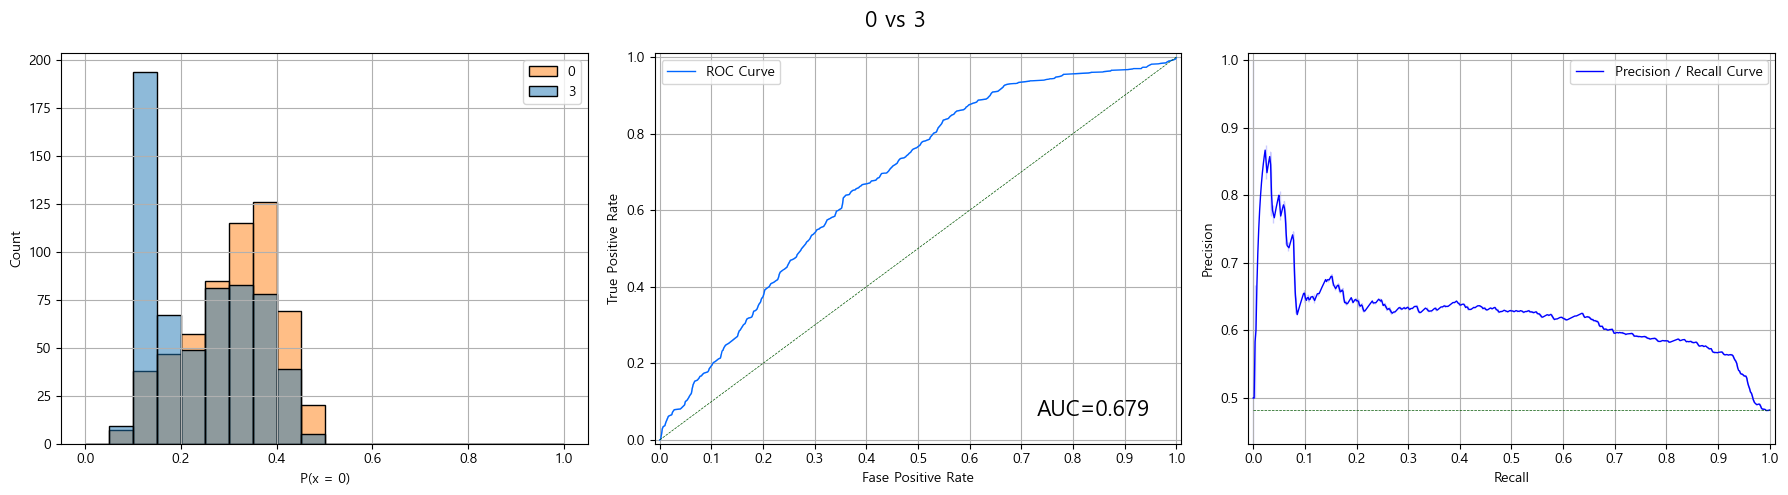

mean roc auc ovo: 0.6763


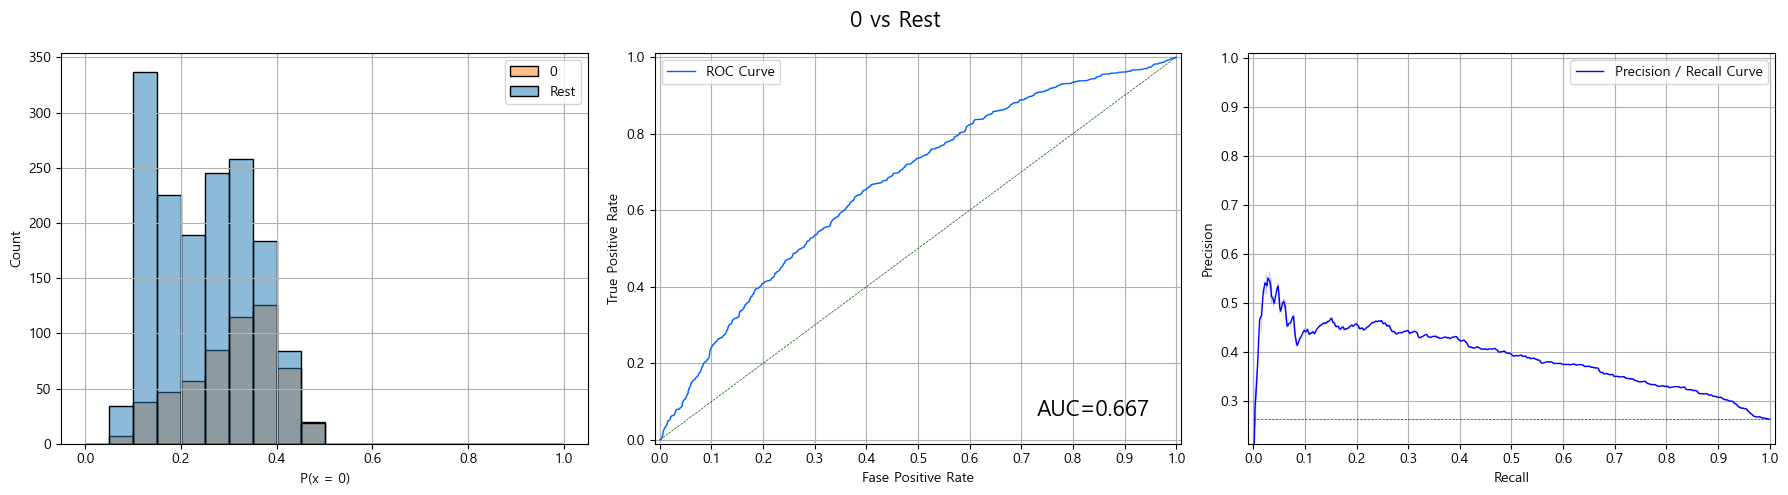

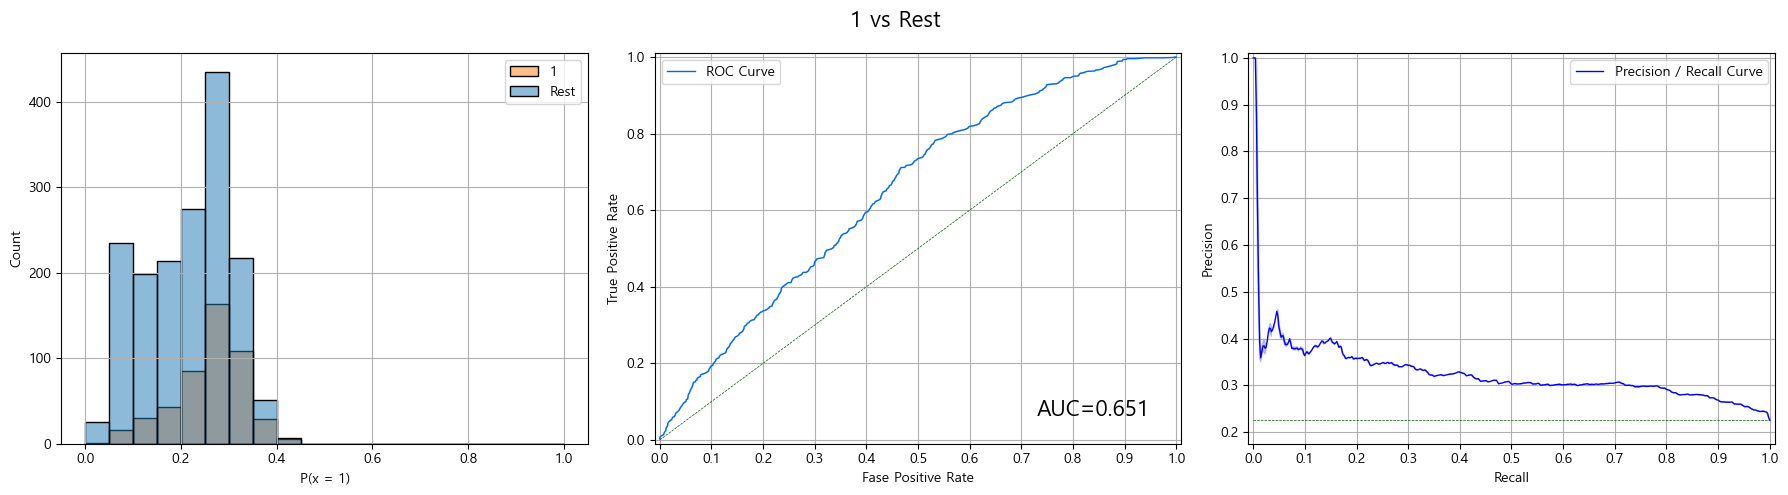

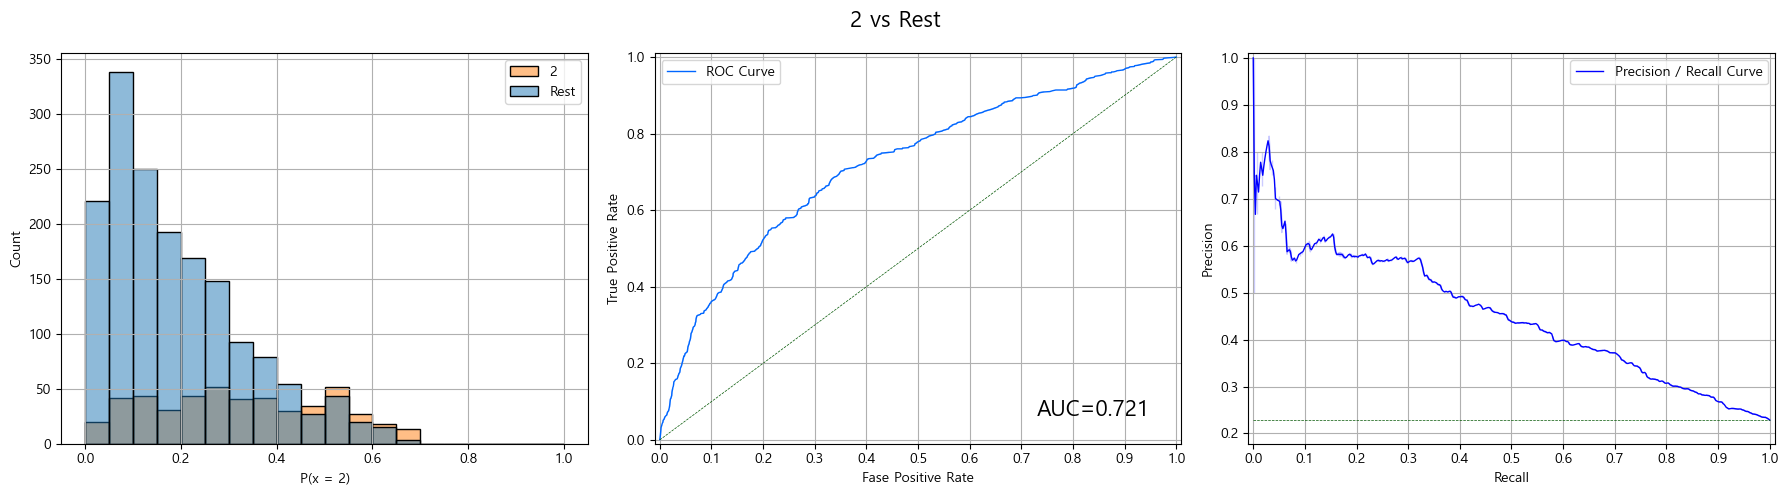

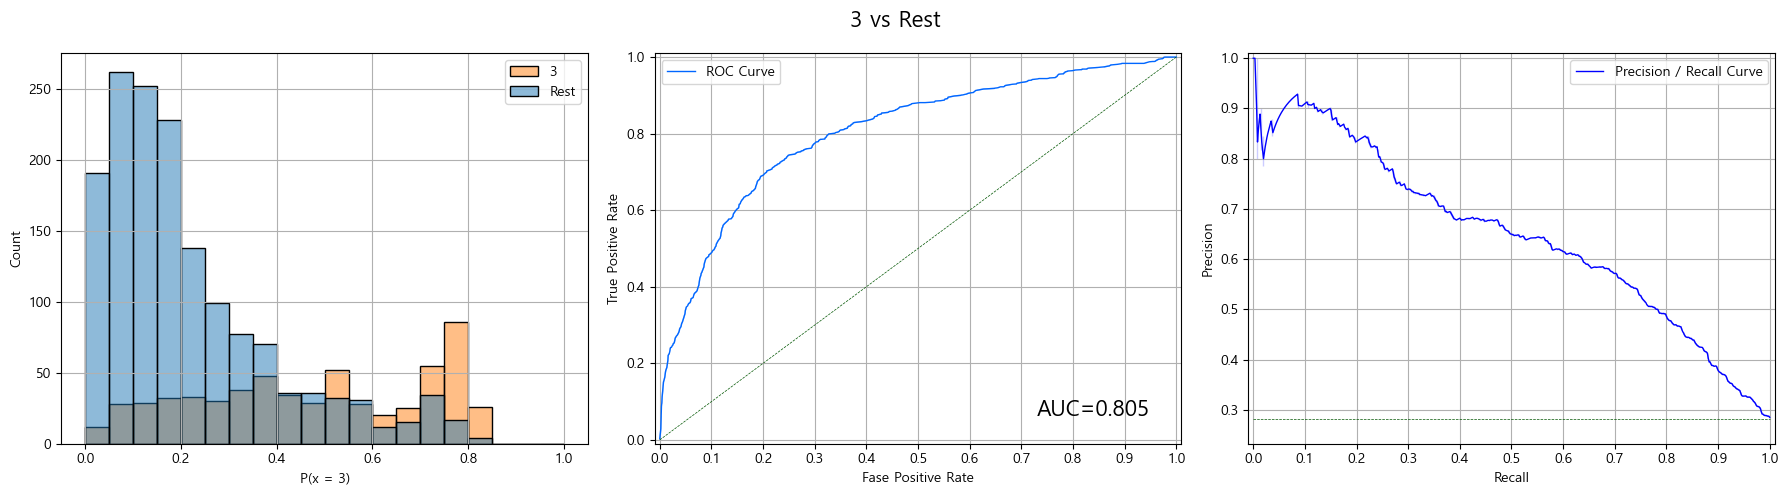

mean roc auc ovo: 0.7108

[학습곡선]


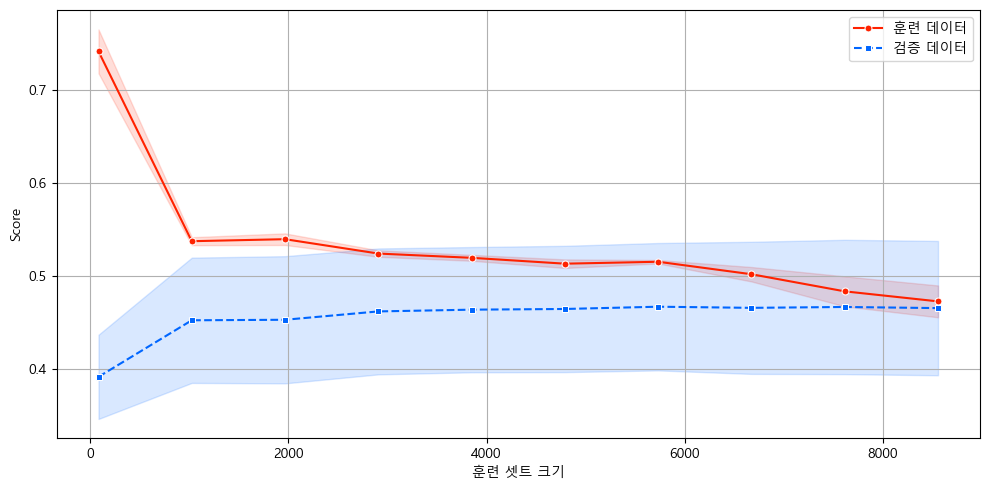

+----+--------------+---------+--------------------------+-----------+-------------+---------+------------+---------+------------+
|    | 종속변수     |   CLASS | 독립변수                 |   B(계수) |    표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+--------------+---------+--------------------------+-----------+-------------+---------+------------+---------+------------|
|  0 | Segmentation |       0 | Age                      |   -0.0044 |       0.004 | -1.1007 |      0.271 | 2.44396 |     0.9956 |
|  1 | Segmentation |       0 | Work_Experience          |    0.0102 |       0.015 |  0.6819 |      0.495 | 1.05979 |     1.0102 |
|  2 | Segmentation |       0 | Family_Size              |   -0.0873 |       0.035 | -2.5019 |      0.012 | 1.27153 |     0.9164 |
|  3 | Segmentation |       0 | Gender_Female            |    0.0611 |  2.1876e+06 |       0 |          1 |     inf |      1.063 |
|  4 | Segmentation |       0 | Gender_Male              |     0.132 | 2.18624e+06 |       0 |       

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [72]:
my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
| 10 | manhattan |             7 | uniform   |           0.43408 |
|  8 | manhattan |             5 | uniform   |          0.420407 |
| 11 | manhattan |             7 | distance  |          0.419121 |
|  4 | euclidean |             7 | uniform   |          0.418888 |
|  2 | euclidean |             5 | uniform   |          0.412811 |
|  6 | manhattan |             3 | uniform   |           0.40977 |
|  5 | euclidean |             7 | distance  |           0.40837 |
|  9 | manhattan |             5 | distance  |          0.407785 |
|  3 | euclidean |             5 | distance  |          0.400773 |
|  0 | euclidean |             3 | uniform   |          0.398669 |
|  7 | manhattan |             3 | distance  |          0.396329 |
|  1 | euclidean |             3 | distance  |         

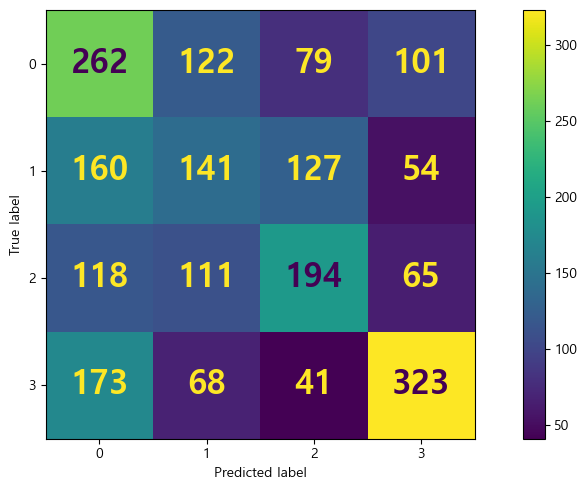


[Roc Curve]


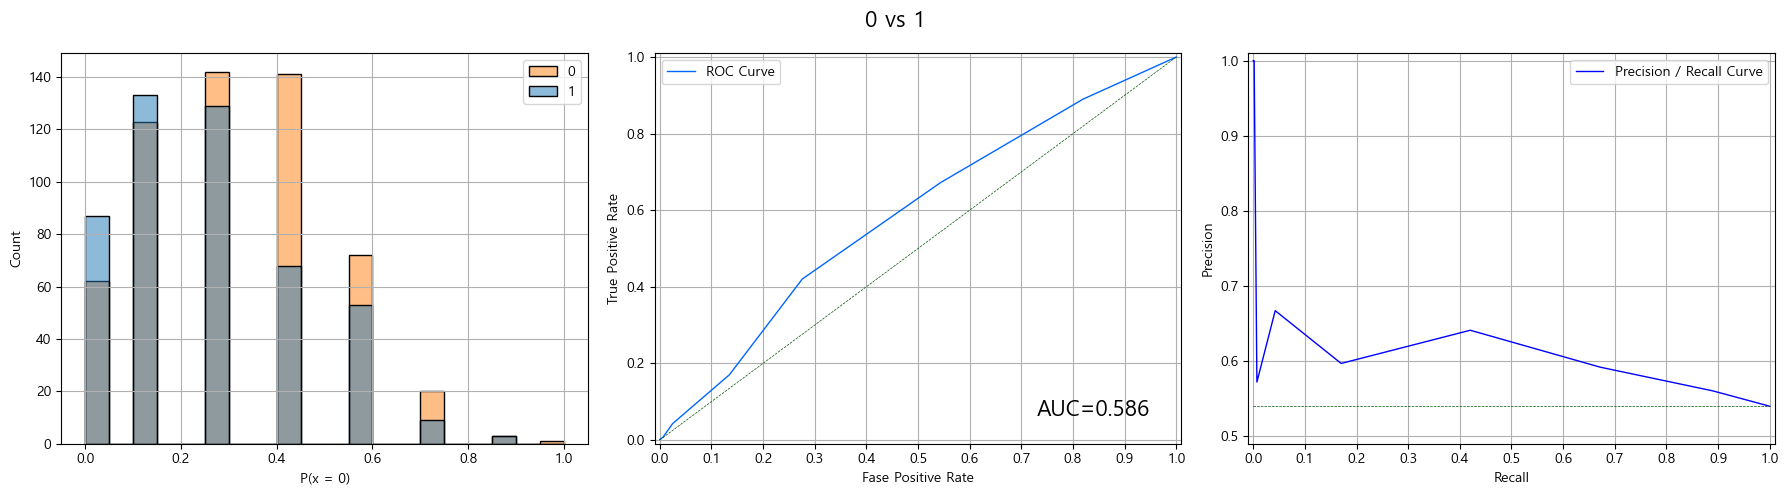

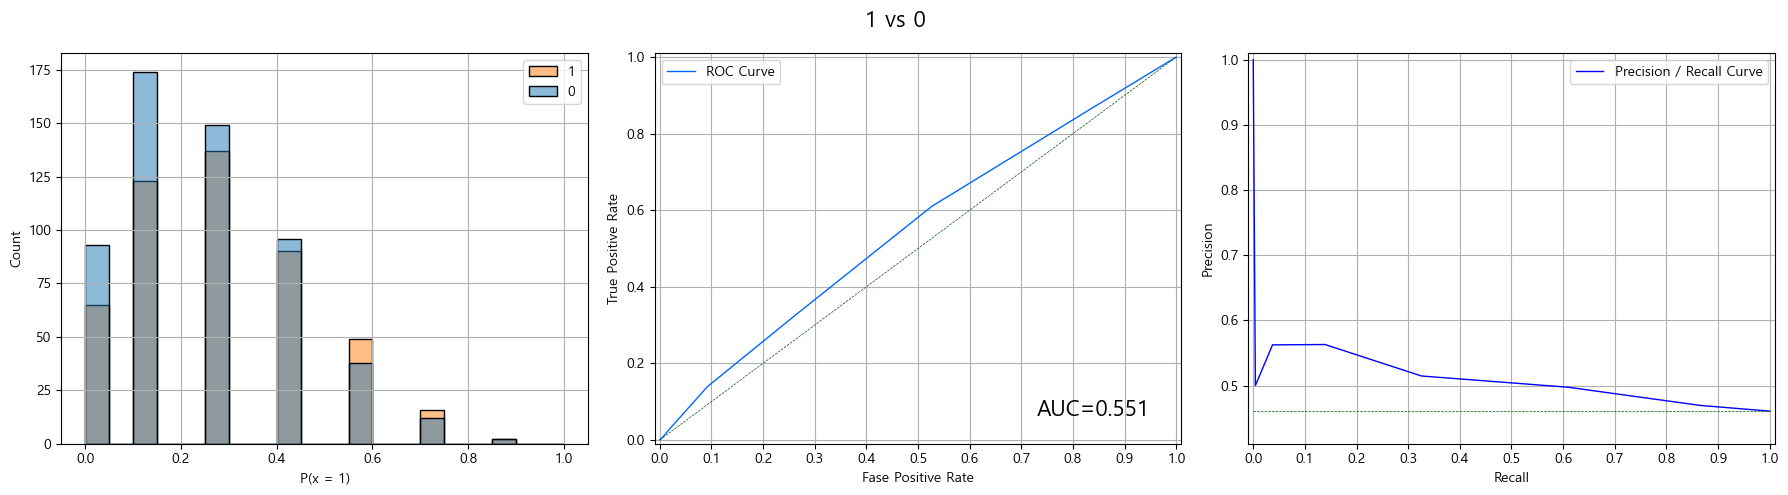

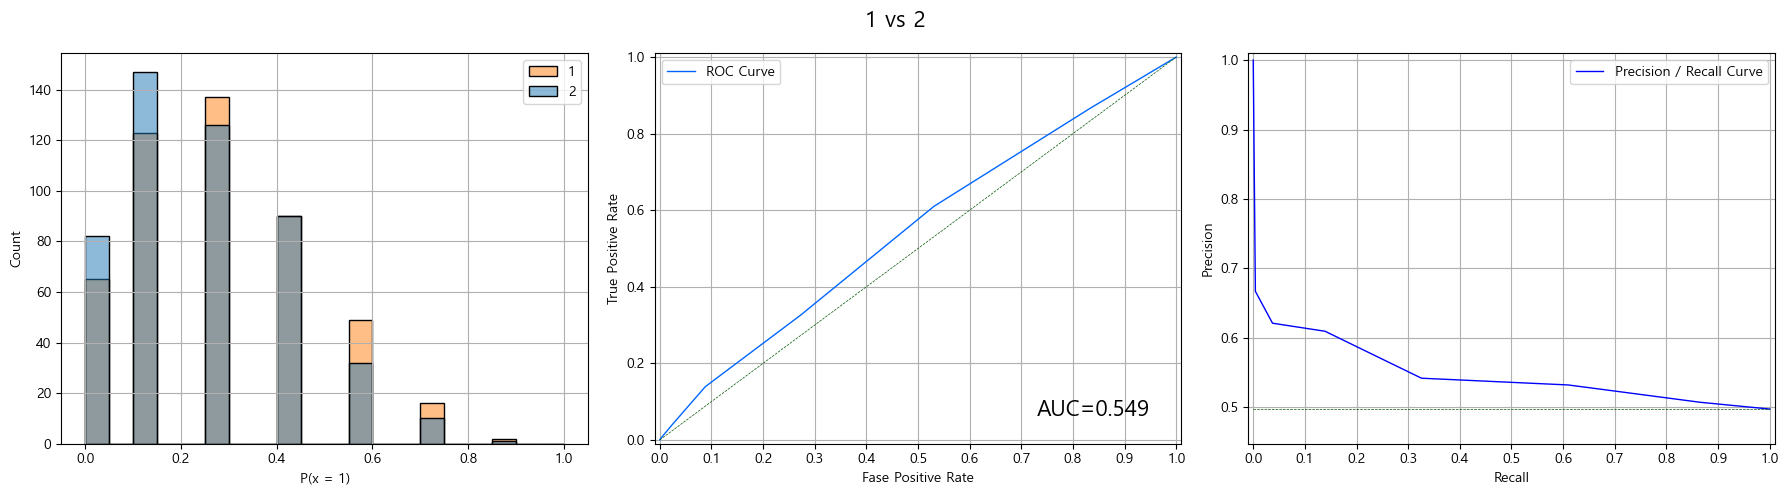

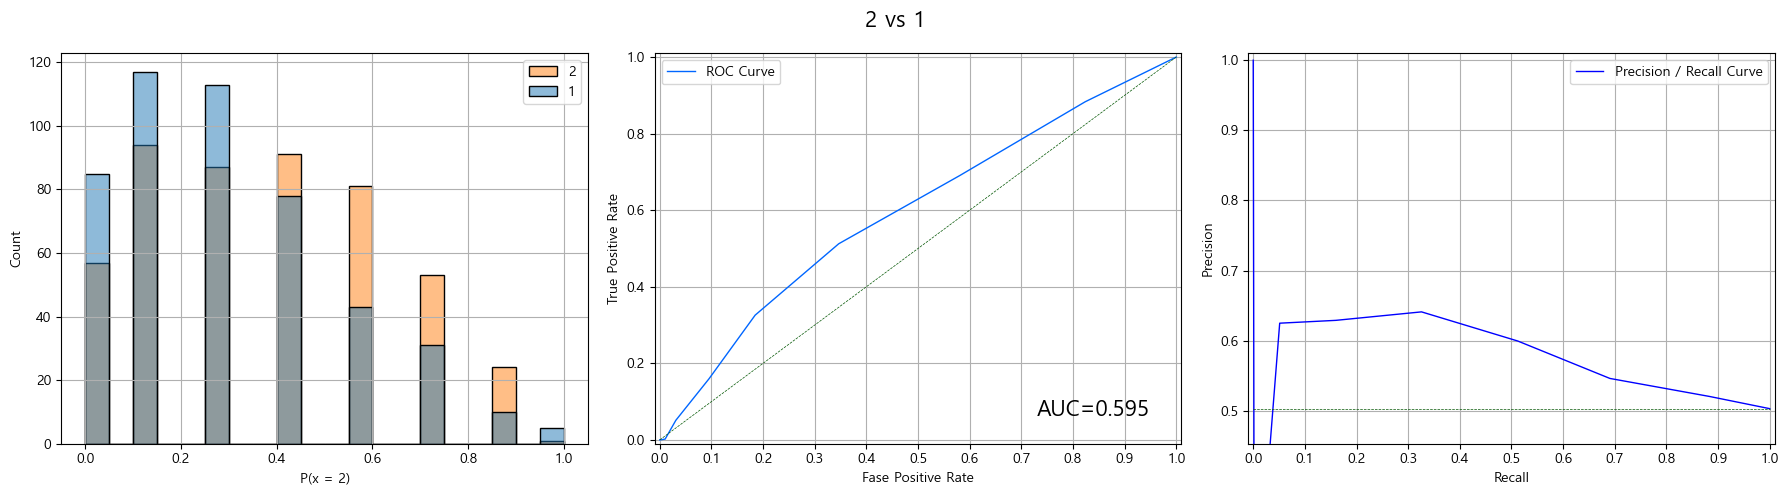

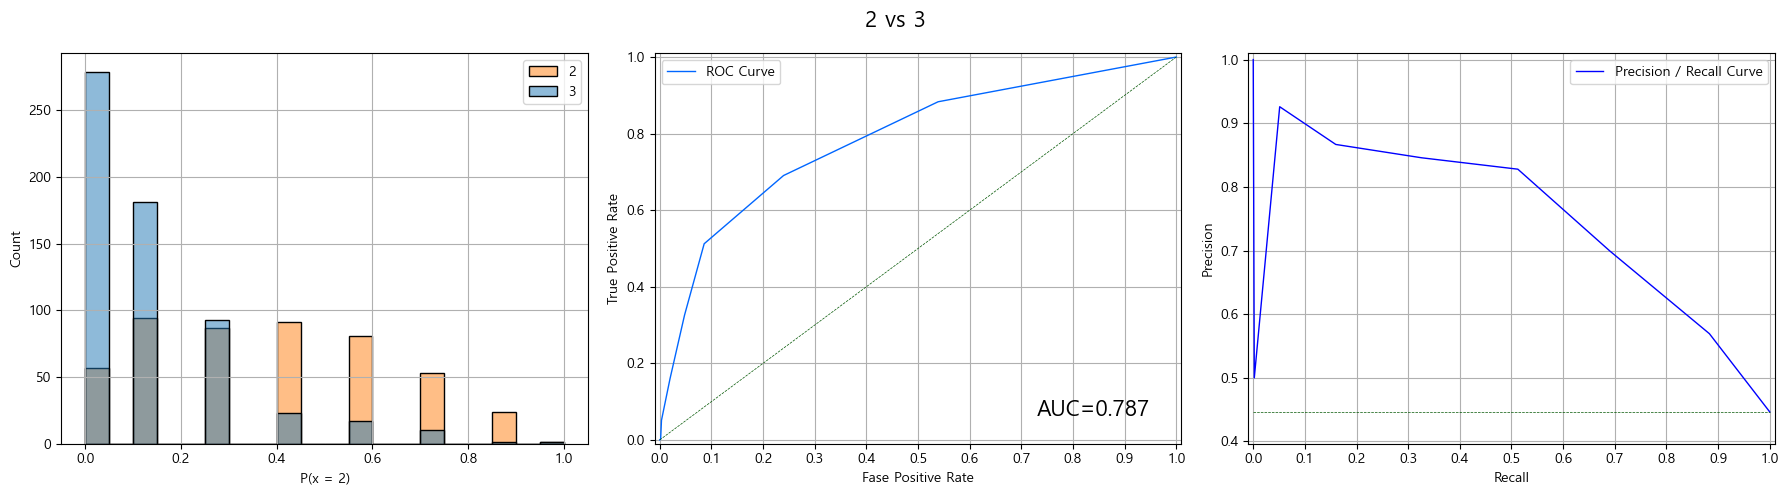

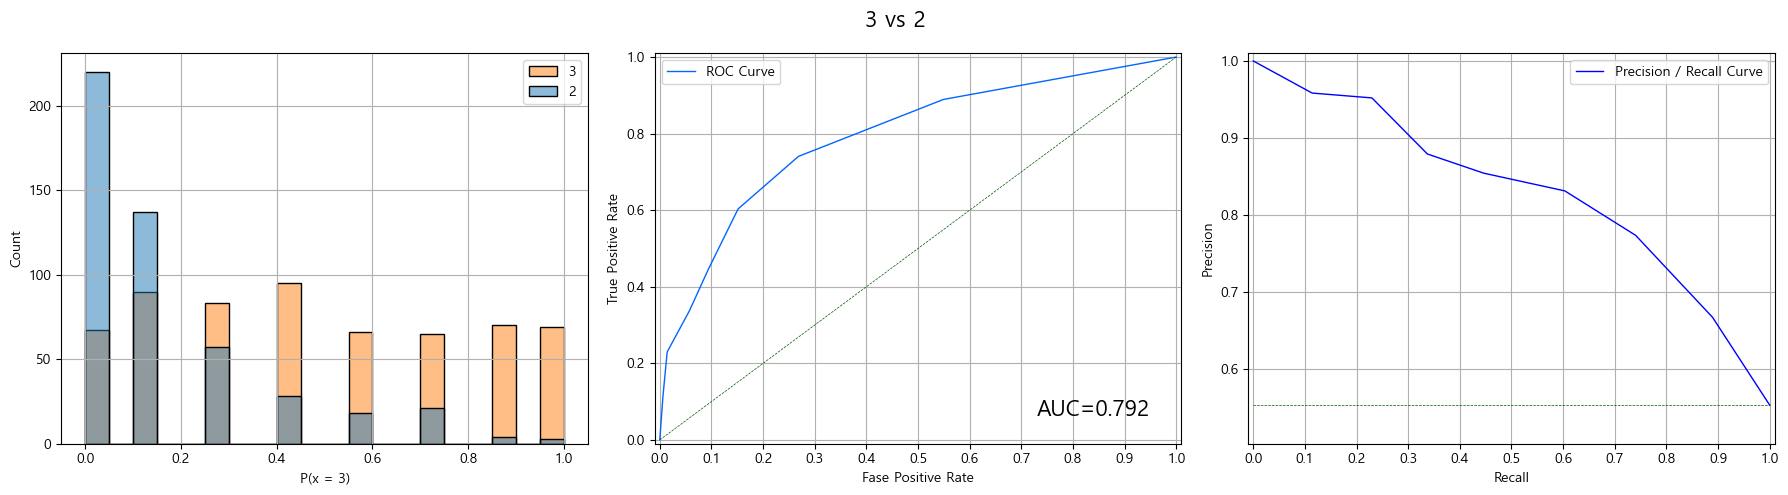

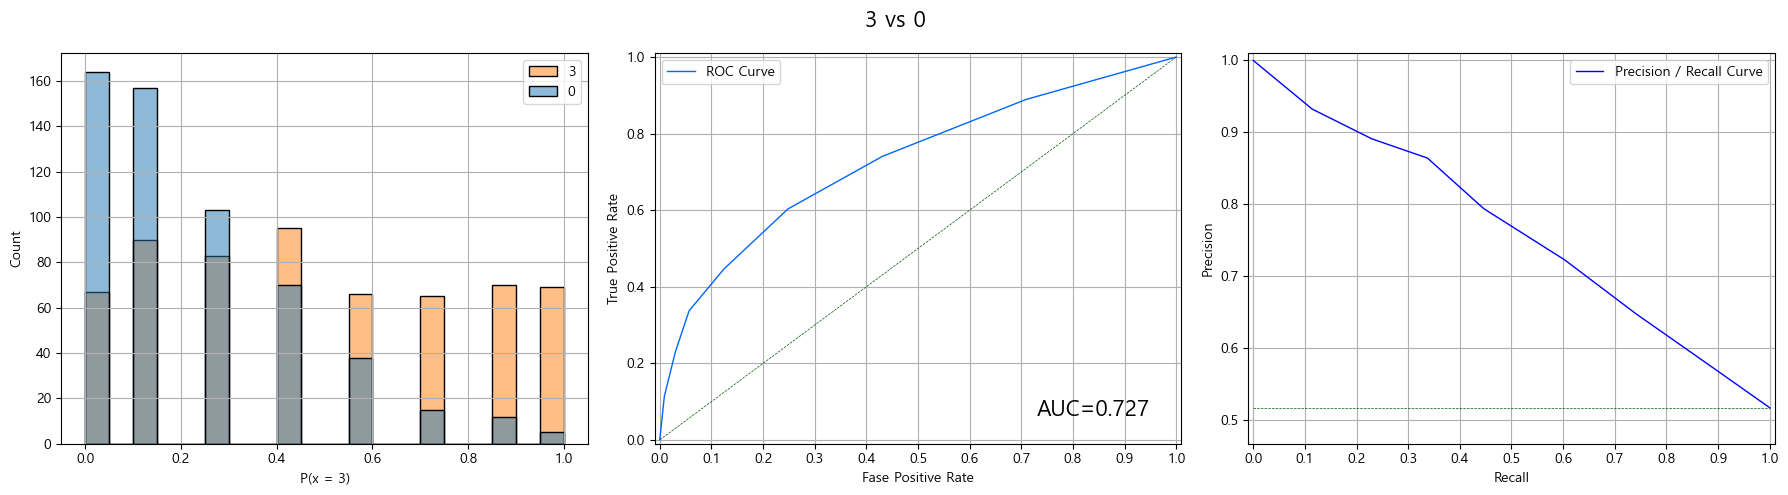

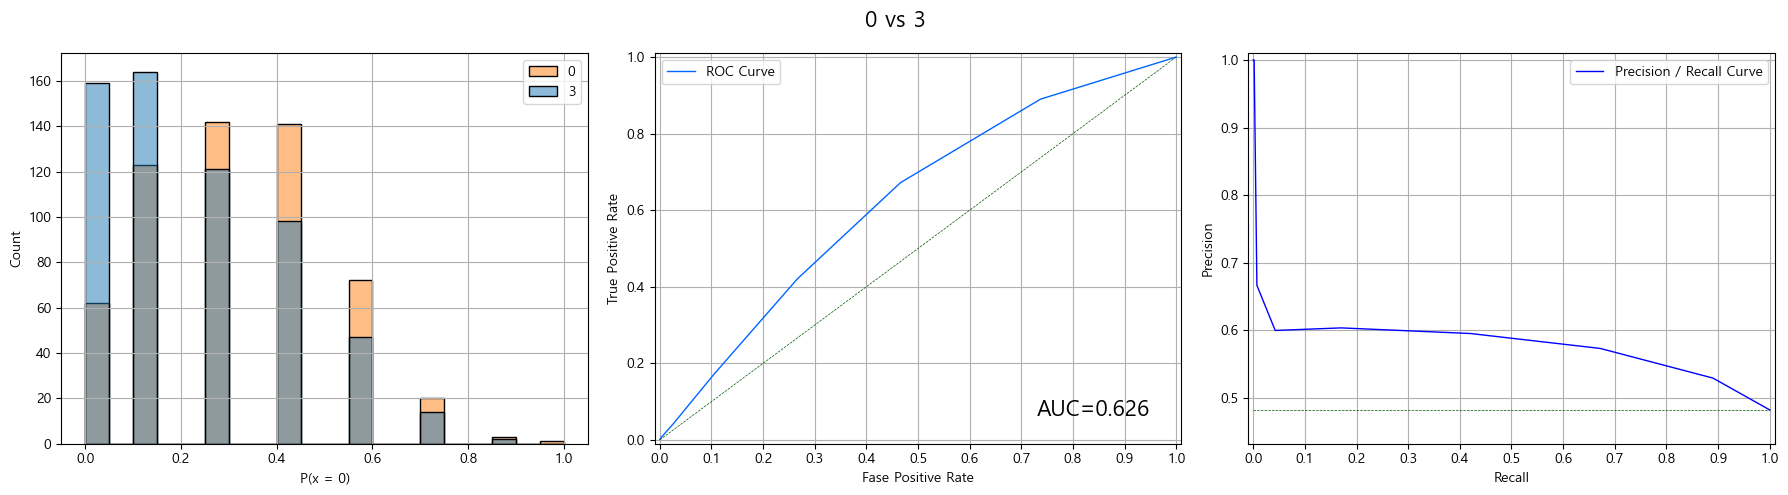

mean roc auc ovo: 0.6515


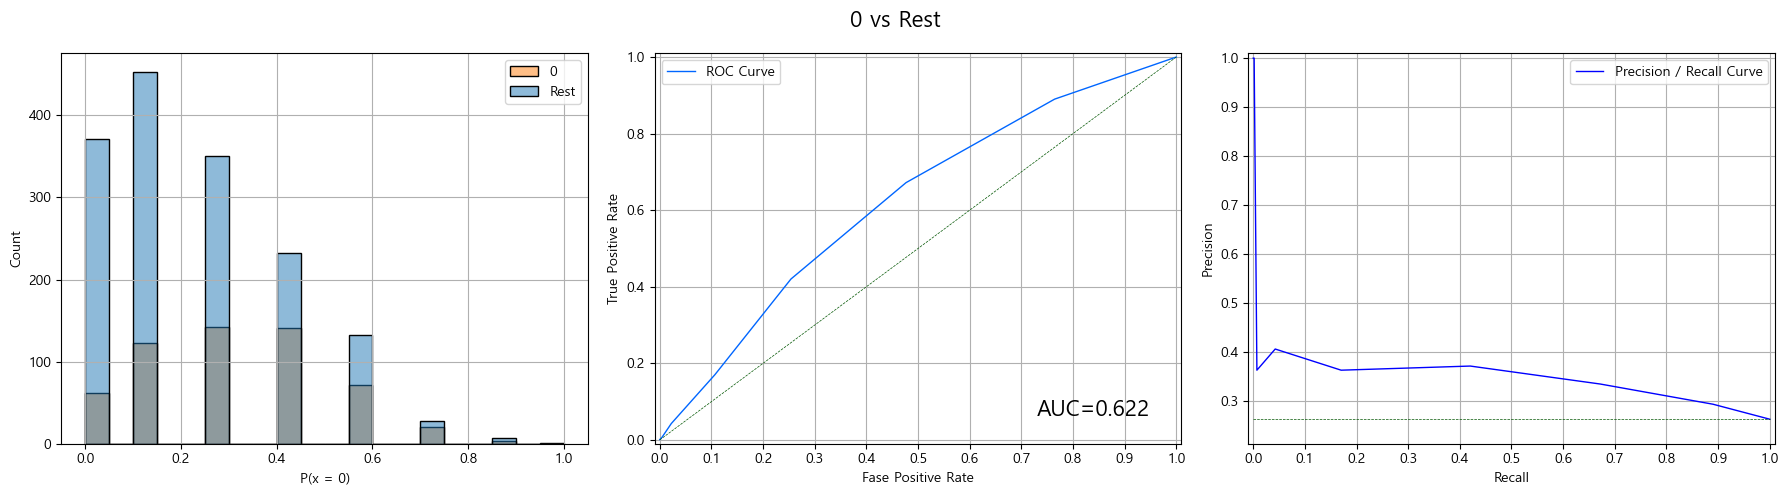

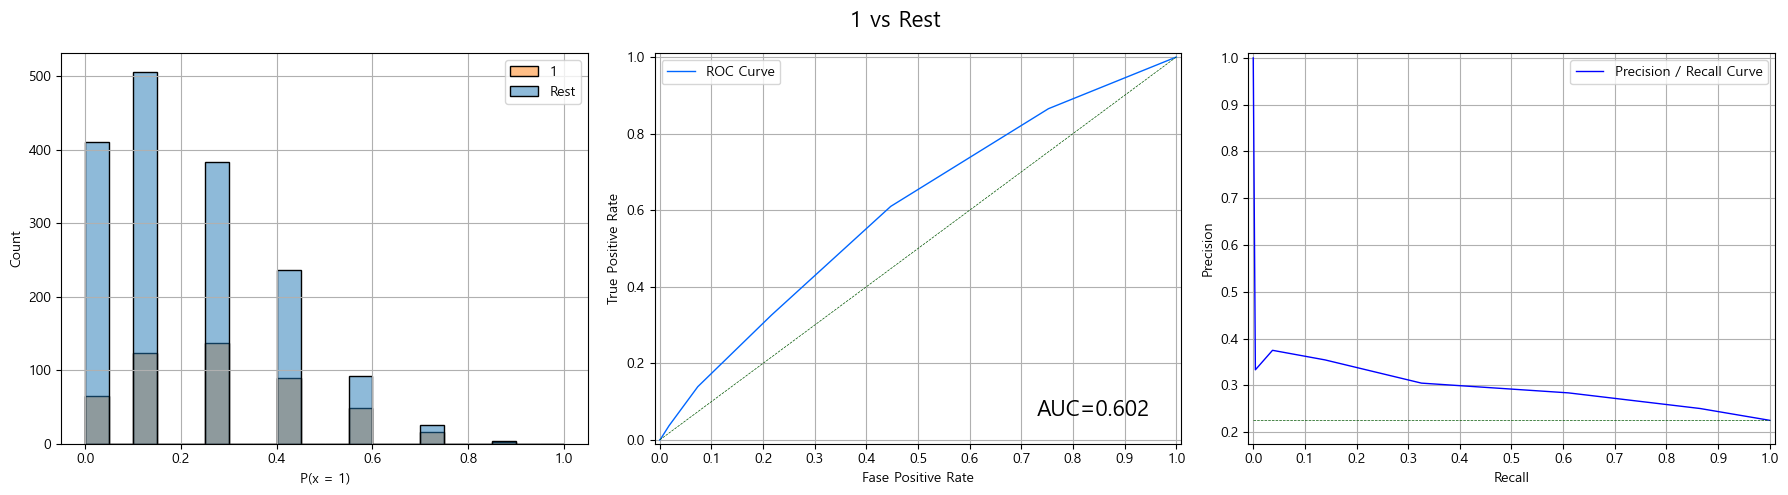

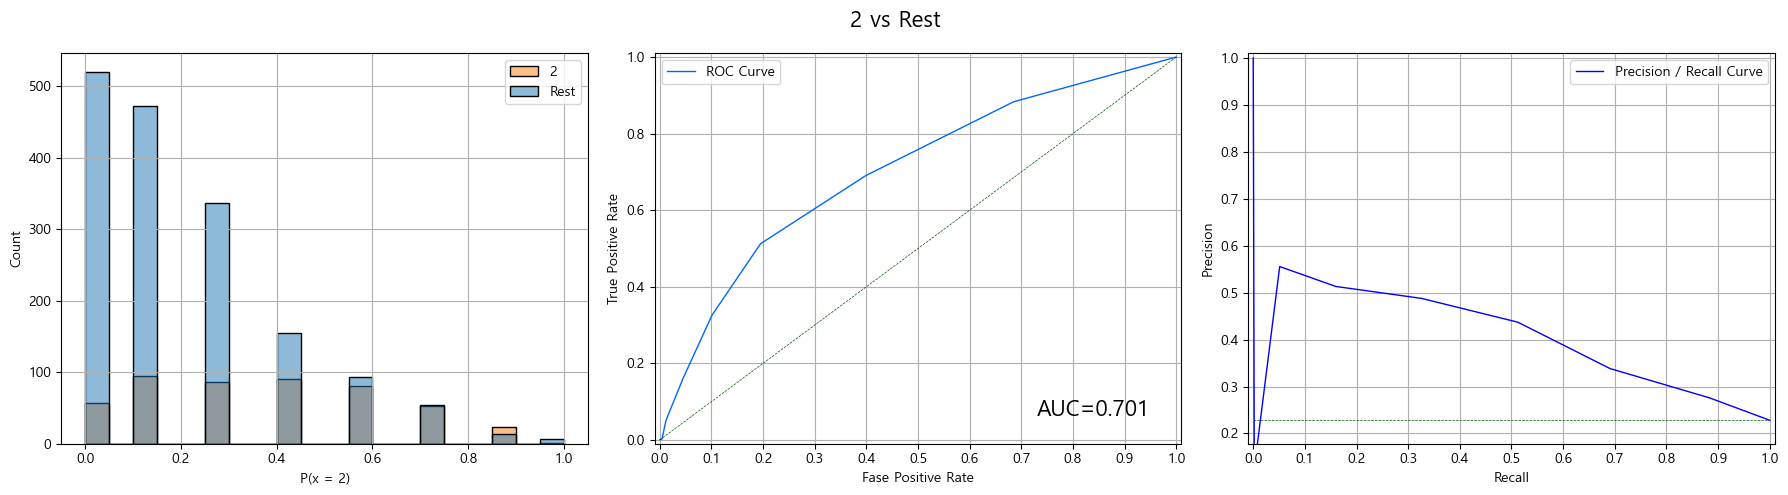

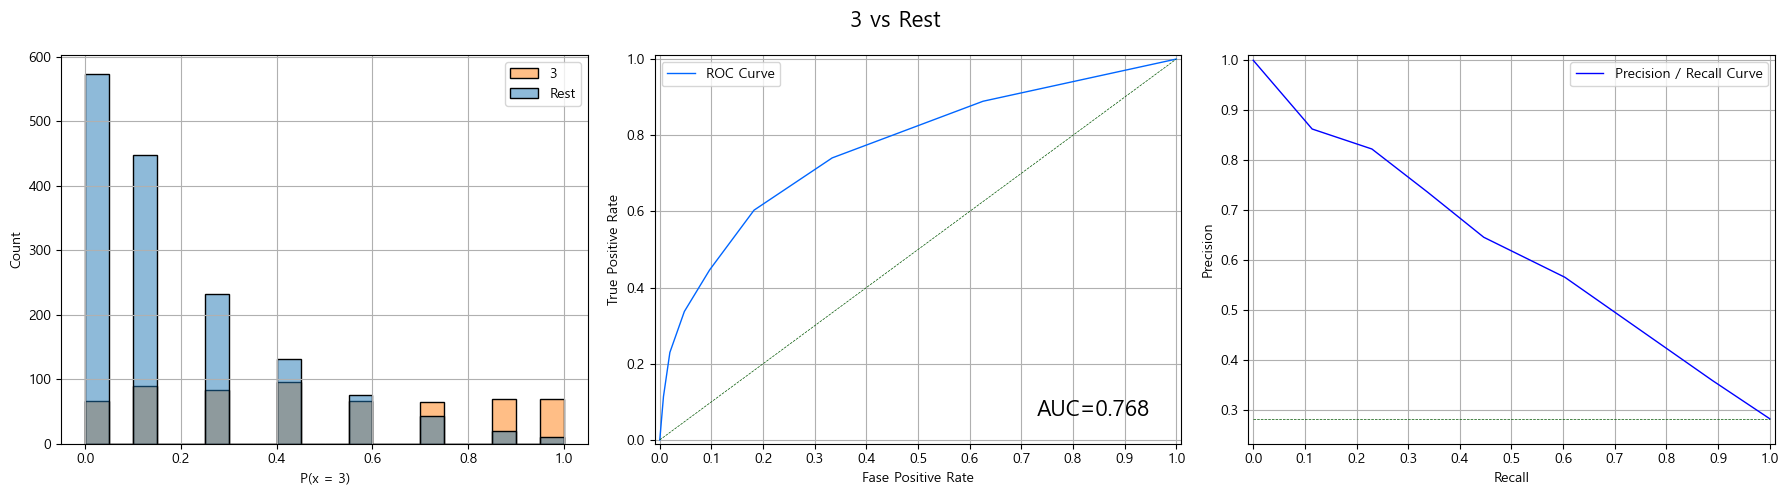

mean roc auc ovo: 0.6733

[학습곡선]


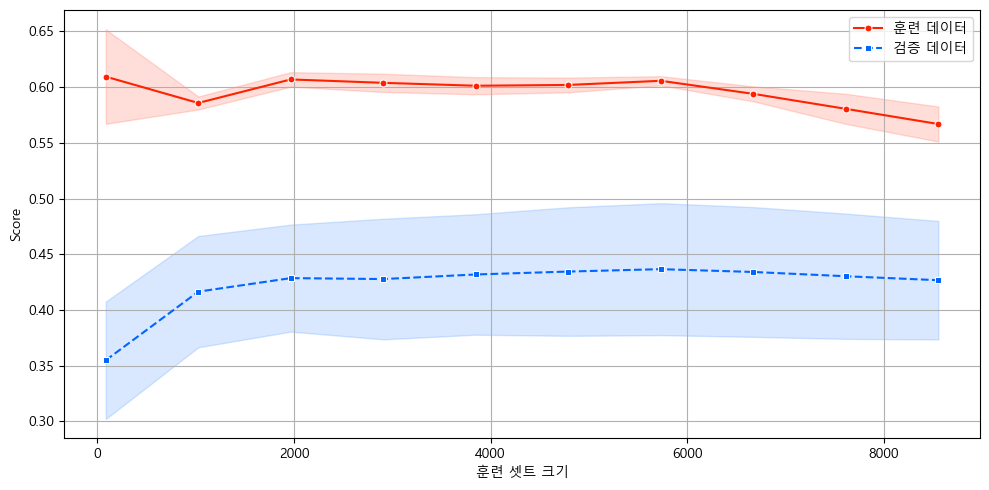

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7)

In [73]:
my_knn_classification(x_train, y_train, x_test, y_test)

In [74]:
%%time

resulf_df = yjk_classifier_multi_gridsearch(support, x_train, x_test, y_train, y_test, randomized_search = True, cv = 5)
resulf_df

CPU times: total: 1min 4s
Wall time: 48 s


,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
LogisticRegression,"LogisticRegression(C=0.1, max_iter=300, n_jobs...","{'penalty': 'l2', 'max_iter': 300, 'C': 0.1}",0.468323,0.469846
SGDClassifier,"SGDClassifier(alpha=0.01, max_iter=500, n_jobs...","{'tol': 0.0001, 'penalty': None, 'max_iter': 5...",0.433610,0.446470
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=7,...","{'weights': 'distance', 'p': 1, 'n_neighbors': 7}",0.422511,0.412810


- 로지스틱 회귀의 성능이 더 좋음